# Notebook bir

In [2]:
import graph_tool.all as gt
import pandas as pd
import os
from tqdm import tqdm
from collections import defaultdict
import json
import csv
from typing import Callable 
import seaborn as sns

# Exploration des données

In [7]:
def preparingData(df : pd.DataFrame) -> pd.DataFrame:
    """
    This function prepares the data for the analysis. It removes the rows where the org is in ['conda-forge', 'Bioconductor', 'openjournals']. It also extracts the actor_id, actor_name, repo_id, repo_name, org_id, org_name from the respective columns.
    """
    
    df = df[df["org"].apply(lambda x: x['login'] not in ['conda-forge', 'Bioconductor', 'openjournals'])].copy()

    df['actor_id'] = df['actor'].apply(lambda x: x['id'])
    df['actor_name'] = df['actor'].apply(lambda x: x['login'])
    df.drop(columns = ['actor'], inplace = True)

    df['repo_id'] = df['repo'].apply(lambda x: x['id'])
    df['repo_name'] = df['repo'].apply(lambda x: x['name'])
    df.drop(columns = ['repo'], inplace = True)

    df['org_id'] = df['org'].apply(lambda x: x['id'])
    df['org_name'] = df['org'].apply(lambda x: x['login'])
    df.drop(columns = ['org'], inplace = True)
    return df

In [8]:

def loadingFiles(directory : str, prepareDataFunc : Callable[[pd.DataFrame], pd.DataFrame] = preparingData) -> pd.DataFrame:
    """
    This function reads all the json files in the directory or a single file and returns a pandas dataframe containing the data. It uses a function to prepare the data. 
    """
    
    
    if os.path.isfile(directory):
        return prepareDataFunc(pd.read_json(directory))
    l = []    
    for file in tqdm(os.listdir(directory), desc = "Reading files"):
        l.append(prepareDataFunc(pd.read_json(os.path.join(directory, file))))
        
    df = pd.concat(l)
    
    return df

On explore un peu les données pour se donner une idée plus précise du nombre d'organisation, de dépot et de contributeurs

In [9]:
data = loadingFiles(os.path.join(os.getcwd(), "NumFocus_Raw_Data_Youness"))

Reading files: 100%|██████████| 18/18 [03:01<00:00, 10.06s/it]


In [33]:
data

type  public  \
0         PullRequestEvent    True   
2                PushEvent    True   
3       CommitCommentEvent    True   
5        IssueCommentEvent    True   
6        IssueCommentEvent    True   
...                    ...     ...   
150831   IssueCommentEvent    True   
150833           PushEvent    True   
150838   IssueCommentEvent    True   
150840           PushEvent    True   
150845  CommitCommentEvent    True   

                                                  payload          created_at  \
0       {"action":"opened","number":25794,"pull_reques... 2023-05-01 00:00:36   
2       {"repository_id":518552866,"push_id":134780672... 2023-05-01 00:02:58   
3       {"comment":{"url":"https://api.github.com/repo... 2023-05-01 00:03:25   
5       {"action":"created","issue":{"url":"https://ap... 2023-05-01 00:05:59   
6       {"action":"created","issue":{"url":"https://ap... 2023-05-01 00:06:04   
...                                                   ...                 ...   
150831  {"action":"created","issue":{"url":"https://ap... 2024-04-30 23:52:52   
150833  {"repository_id":293420481,"push_id":182286164... 2024-04-30 23:53:35   
150838  {"action":"created","issue":{"url":"https://ap... 2024-04-30 23:56:48   
150840  {"repository_id":6150069,"push_id":18228640056... 2024-04-30 23:57:24   
150845  {"comment":{"url":"https://api.github.com/repo... 2024-04-30 23:59:49   

                 id                                         other  actor_id  \
0       28760747877  {"actor":{"display_login":"MichaelTheFear"}}  75355609   
2       28760767761  {"actor":{"display_login":"github-actions"}}  41898282   
3       28760771170          {"actor":{"display_login":"vercel"}}  35613825   
5       28760790294  {"actor":{"display_login":"github-actions"}}  41898282   
6       28760790817  {"actor":{"display_login":"github-actions"}}  41898282   
...             ...                                           ...       ...   
150831  37976538105            {"actor":{"display_login":"gtca"}}  32863903   
150833  37976549460           {"actor":{"display_login":"mmcky"}}   8263752   
150838  37976596077         {"actor":{"display_login":"stefanv"}}     45071   
150840  37976604242            {"actor":{"display_login":"odow"}}   8177701   
150845  37976637803  {"actor":{"display_login":"github-actions"}}  41898282   

                 actor_name    repo_id  \
0            MichaelTheFear    1385122   
2       github-actions[bot]  518552866   
3               vercel[bot]  518552866   
5       github-actions[bot]     858127   
6       github-actions[bot]     858127   
...                     ...        ...   
150831                 gtca  449112374   
150833                mmcky  293420481   
150838              stefanv  545712463   
150840                 odow    6150069   
150845  github-actions[bot]  293420481   

                                        repo_name    org_id  \
0                           matplotlib/matplotlib    215947   
2                                  napari/npe2api  39813916   
3                                  napari/npe2api  39813916   
5                               pandas-dev/pandas  21206976   
6                               pandas-dev/pandas  21206976   
...                                           ...       ...   
150831                  scverse/scverse.github.io  95305807   
150833  QuantEcon/lecture-python-programming.myst   8703060   
150838                     scientific-python/spin  41802190   
150840                           jump-dev/JuMP.jl  48496332   
150845  QuantEcon/lecture-python-programming.myst   8703060   

                 org_name          event_time  
0              matplotlib 2023-05-01 00:00:36  
2                  napari 2023-05-01 00:02:58  
3                  napari 2023-05-01 00:03:25  
5              pandas-dev 2023-05-01 00:05:59  
6              pandas-dev 2023-05-01 00:06:04  
...                   ...                 ...  
150831            scverse 2024-04-30 23:52:52

In [ ]:
data["org_name"].value_counts()

org_name
napari                       108211
JuliaLang                    100591
SciML                         91736
pandas-dev                    89971
galaxyproject                 63608
scikit-learn                  59816
numpy                         52976
scipy                         52757
astropy                       51051
conda                         46366
matplotlib                    46249
scverse                       45563
OSGeo                         45030
holoviz                       44403
ropensci                      37497
dask                          32685
jump-dev                      32360
sympy                         32244
pydata                        29213
lfortran                      29146
pymc-devs                     27955
jupyter                       27179
MDAnalysis                    22103
stan-dev                      21927
sunpy                         21422
FEniCS                        20023
InsightSoftwareConsortium     19753
QuantEcon          

In [ ]:
data['repo_name'].value_counts()

repo_name
pandas-dev/pandas                85480
JuliaLang/julia                  76976
napari/npe2api                   76318
scikit-learn/scikit-learn        56804
scipy/scipy                      50101
                                 ...  
gnu-octave/octave-websockets         1
Open-MBEE/jsonPath2                  1
cupy/cccl                            1
WorldWideTelescope/wwt-remote        1
Open-MBEE/OMGSpecifications          1
Name: count, Length: 2384, dtype: int64

In [32]:
data['actor_name'].value_counts()

actor_name
github-actions[bot]    82657
ChrisRackauckas        34361
vercel[bot]            34281
odow                   20871
mroeschke              19344
                       ...  
liquanoba                  1
shaochen-lb                1
loub9                      1
chaomi1998                 1
awagenknecht               1
Name: count, Length: 98371, dtype: int64

## Exploration plus profonde pour détecter les évènements importants

On essaye également de repérer les collaborations directes entre les utilisateurs. Pour cela, on va inspecter d'un peu plus près le payload et ajouter un traitement supplémentaire aux données afin de rendre plus simple la construction du nouveau graphe.

In [ ]:
data = loadingFiles(os.path.join(os.getcwd(), "NumFocus_Raw_Data_Youness", "gh_events_202406.json"))

In [6]:
data['type'].value_counts()

type
IssueCommentEvent                19800
PushEvent                        14346
PullRequestReviewEvent           12802
PullRequestReviewCommentEvent    10301
PullRequestEvent                 10015
WatchEvent                        5184
IssuesEvent                       4545
CreateEvent                       2233
DeleteEvent                       1852
ForkEvent                         1666
CommitCommentEvent                 269
ReleaseEvent                       265
GollumEvent                        129
MemberEvent                         20
PublicEvent                          1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='type'>

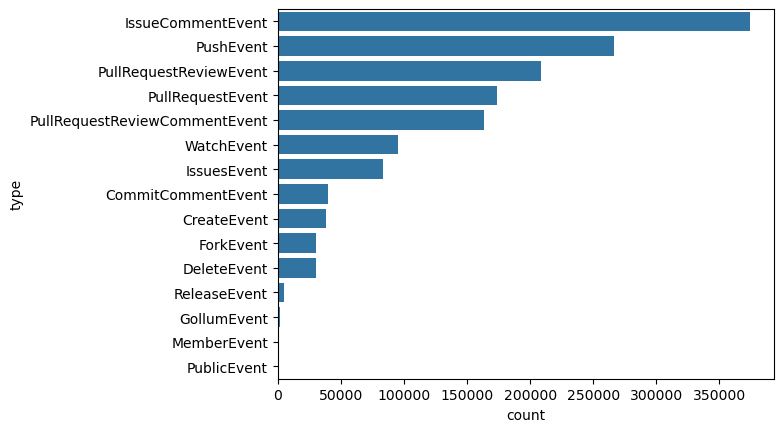

In [15]:
sns.countplot(data['type'], order = data['type'].value_counts().index)

Sur tous ces events, on peut en écarter certains (suite à leur description sur le site [github-event-type](https://docs.github.com/en/rest/using-the-rest-api/github-event-types?apiVersion=2022-11-28#event-object-common-properties)): 
- CommitCommentEvent
- CreateEvent
- DeleteEvent
- ForkEvent
- GollumEvent
- MemberEvent
- PublicEvent
- PushEvent
- ReleaseEvent
- WatchEvent

Il ne nous reste donc plus que les évènements suivants : 
- IssueCommentEvent
- IssuesEvent
- PullRequestEvent
- PullRequestReviewEvent
- PullRequestReviewCommentEvent

Pour identifier les collaborations, on va faire ça type d'événement par type d'évènement (car le payload change pour chaque type d'évènement)

On commence par les pullRequests

In [7]:
pullRquestsReviewDf = data[data['type'].isin(['PullRequestReviewCommentEvent', 'PullRequestReviewEvent', 'PullRequestEvent'])]
pullRquestsReviewDf

type  public  \
0              PullRequestReviewEvent    True   
16      PullRequestReviewCommentEvent    True   
18             PullRequestReviewEvent    True   
21             PullRequestReviewEvent    True   
24             PullRequestReviewEvent    True   
...                               ...     ...   
223573         PullRequestReviewEvent    True   
223574  PullRequestReviewCommentEvent    True   
223576         PullRequestReviewEvent    True   
223578               PullRequestEvent    True   
223580  PullRequestReviewCommentEvent    True   

                                                  payload          created_at  \
0       {"action":"created","review":{"id":2091866477,... 2024-06-01 00:00:10   
16      {"action":"created","comment":{"url":"https://... 2024-06-01 00:05:12   
18      {"action":"created","review":{"id":2091868618,... 2024-06-01 00:05:12   
21      {"action":"created","review":{"id":2091869952,... 2024-06-01 00:06:09   
24      {"action":"created","review":{"id":2091866477,... 2024-06-01 00:06:54   
...                                                   ...                 ...   
223573  {"action":"created","review":{"id":2150223597,... 2024-06-30 23:56:43   
223574  {"action":"created","comment":{"url":"https://... 2024-06-30 23:56:50   
223576  {"action":"created","review":{"id":2150223886,... 2024-06-30 23:58:04   
223578  {"action":"opened","number":3958,"pull_request... 2024-06-30 23:59:45   
223580  {"action":"created","comment":{"url":"https://... 2024-06-30 23:59:48   

                 id                                       other  actor_id  \
0       38901070706      {"actor":{"display_login":"AtreyeeS"}}  32677370   
16      38901131900      {"actor":{"display_login":"AtreyeeS"}}  32677370   
18      38901131867      {"actor":{"display_login":"AtreyeeS"}}  32677370   
21      38901145595      {"actor":{"display_login":"AtreyeeS"}}  32677370   
24      38901158377      {"actor":{"display_login":"AtreyeeS"}}  32677370   
...             ...                                         ...       ...   
223573  39747352835        {"actor":{"display_login":"ninsbl"}}   4246620   
223574  39747378002       {"actor":{"display_login":"mdhaber"}}   6570539   
223576  39747363302         {"actor":{"display_login":"mmcky"}}   8263752   
223578  39747375763  {"actor":{"display_login":"ShubhamDesai"}}  42180509   
223580  39747378007       {"actor":{"display_login":"mdhaber"}}   6570539   

          actor_name    repo_id                       repo_name   org_id  \
0           AtreyeeS   10073640                 gammapy/gammapy   852764   
16          AtreyeeS   10073640                 gammapy/gammapy   852764   
18          AtreyeeS   10073640                 gammapy/gammapy   852764   
21          AtreyeeS   10073640                 gammapy/gammapy   852764   
24          AtreyeeS   10073640                 gammapy/gammapy   852764   
...              ...        ...                             ...      ...   
223573        ninsbl  187247007                     OSGeo/grass  1058467   
223574       mdhaber    1460385                     scipy/scipy   288277   
223576         mmcky  590234390  QuantEcon/lecture-python-intro  8703060   
223578  ShubhamDesai  187247007                     OSGeo/grass  1058467   
223580       mdhaber    1460385                     scipy/scipy   288277   

         org_name  
0         gammapy  
16        gammapy  
18        gammapy  
21        gammapy  
24        gammapy  
...           ...  
223573      OSGeo  
223574      scipy  
223576  QuantEcon  
223578      OSGeo  
223580      scipy  

[33118 rows x 12 columns]

Comme le payload est un str type, on le converti en dict avec json

In [8]:
json.loads(pullRquestsReviewDf['payload'].iloc[0])

{'action': 'created',
 'review': {'id': 2091866477,
  'node_id': 'PRR_kwDOAJm2KM58r1lt',
  'user': {'login': 'AtreyeeS',
   'id': 32677370,
   'node_id': 'MDQ6VXNlcjMyNjc3Mzcw',
   'avatar_url': 'https://avatars.githubusercontent.com/u/32677370?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/AtreyeeS',
   'html_url': 'https://github.com/AtreyeeS',
   'followers_url': 'https://api.github.com/users/AtreyeeS/followers',
   'following_url': 'https://api.github.com/users/AtreyeeS/following{/other_user}',
   'gists_url': 'https://api.github.com/users/AtreyeeS/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/AtreyeeS/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/AtreyeeS/subscriptions',
   'organizations_url': 'https://api.github.com/users/AtreyeeS/orgs',
   'repos_url': 'https://api.github.com/users/AtreyeeS/repos',
   'events_url': 'https://api.github.com/users/AtreyeeS/events{/privacy}',
   'received_events_url': 'https:

On fait en sorte que l'id de la pull request et de la review soit accessible facilement dans la table.

In [9]:
pullRquestsReviewDf["id_pull_request"] = pullRquestsReviewDf['payload'].apply(lambda x: json.loads(x)["pull_request"]["id"])
pullRquestsReviewDf['id_review'] = pullRquestsReviewDf['payload'].apply(lambda x: str(json.loads(x)["review"]["id"]) if "review" in json.loads(x) else None)

/var/folders/wz/_cgsfm9j7cgdzc8ktt5dnpr40000gp/T/ipykernel_1881/4239480663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pullRquestsReviewDf["id_pull_request"] = pullRquestsReviewDf['payload'].apply(lambda x: json.loads(x)["pull_request"]["id"])
/var/folders/wz/_cgsfm9j7cgdzc8ktt5dnpr40000gp/T/ipykernel_1881/4239480663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pullRquestsReviewDf['id_review'] = pullRquestsReviewDf['payload'].apply(lambda x: str(json.loads(x)["review"]["id"]) if "review" in j

In [10]:
pullRquestsReviewDf

type  public  \
0              PullRequestReviewEvent    True   
16      PullRequestReviewCommentEvent    True   
18             PullRequestReviewEvent    True   
21             PullRequestReviewEvent    True   
24             PullRequestReviewEvent    True   
...                               ...     ...   
223573         PullRequestReviewEvent    True   
223574  PullRequestReviewCommentEvent    True   
223576         PullRequestReviewEvent    True   
223578               PullRequestEvent    True   
223580  PullRequestReviewCommentEvent    True   

                                                  payload          created_at  \
0       {"action":"created","review":{"id":2091866477,... 2024-06-01 00:00:10   
16      {"action":"created","comment":{"url":"https://... 2024-06-01 00:05:12   
18      {"action":"created","review":{"id":2091868618,... 2024-06-01 00:05:12   
21      {"action":"created","review":{"id":2091869952,... 2024-06-01 00:06:09   
24      {"action":"created","review":{"id":2091866477,... 2024-06-01 00:06:54   
...                                                   ...                 ...   
223573  {"action":"created","review":{"id":2150223597,... 2024-06-30 23:56:43   
223574  {"action":"created","comment":{"url":"https://... 2024-06-30 23:56:50   
223576  {"action":"created","review":{"id":2150223886,... 2024-06-30 23:58:04   
223578  {"action":"opened","number":3958,"pull_request... 2024-06-30 23:59:45   
223580  {"action":"created","comment":{"url":"https://... 2024-06-30 23:59:48   

                 id                                       other  actor_id  \
0       38901070706      {"actor":{"display_login":"AtreyeeS"}}  32677370   
16      38901131900      {"actor":{"display_login":"AtreyeeS"}}  32677370   
18      38901131867      {"actor":{"display_login":"AtreyeeS"}}  32677370   
21      38901145595      {"actor":{"display_login":"AtreyeeS"}}  32677370   
24      38901158377      {"actor":{"display_login":"AtreyeeS"}}  32677370   
...             ...                                         ...       ...   
223573  39747352835        {"actor":{"display_login":"ninsbl"}}   4246620   
223574  39747378002       {"actor":{"display_login":"mdhaber"}}   6570539   
223576  39747363302         {"actor":{"display_login":"mmcky"}}   8263752   
223578  39747375763  {"actor":{"display_login":"ShubhamDesai"}}  42180509   
223580  39747378007       {"actor":{"display_login":"mdhaber"}}   6570539   

          actor_name    repo_id                       repo_name   org_id  \
0           AtreyeeS   10073640                 gammapy/gammapy   852764   
16          AtreyeeS   10073640                 gammapy/gammapy   852764   
18          AtreyeeS   10073640                 gammapy/gammapy   852764   
21          AtreyeeS   10073640                 gammapy/gammapy   852764   
24          AtreyeeS   10073640                 gammapy/gammapy   852764   
...              ...        ...                             ...      ...   
223573        ninsbl  187247007                     OSGeo/grass  1058467   
223574       mdhaber    1460385                     scipy/scipy   288277   
223576         mmcky  590234390  QuantEcon/lecture-python-intro  8703060   
223578  ShubhamDesai  187247007                     OSGeo/grass  1058467   
223580       mdhaber    1460385                     scipy/scipy   288277   

         org_name  id_pull_request   id_review  
0         gammapy       1798205380  2091866477  
16        gammapy       1798205380        None  
18        gammapy       1798205380  2091868618  
21        gammapy       1798205380  2091869952  
24        gammapy       1798205380  2091866477  
...           ...              ...         ...  
223573      OSGeo       1946118942  2150223597  
223574      scipy       1945972580        None  
223576  QuantEcon       1881674398  2150223886  
223578      OSGeo       1946147469        None  
223580      scipy       1945972580        None  

[33118 rows x 14 columns]

In [11]:
pullRquestsReviewDf["id_pull_request"].value_counts()

id_pull_request
1922219000    178
1901625062    164
1919738745    144
1863914506    144
1919816518    132
             ... 
1934101205      1
157991901       1
1910197596      1
1753025425      1
1946147469      1
Name: count, Length: 6449, dtype: int64

In [12]:
pullRquestsReviewDf[pullRquestsReviewDf["id_pull_request"] == 1922219000]

type  public  \
88852                PullRequestEvent    True   
91769   PullRequestReviewCommentEvent    True   
91814   PullRequestReviewCommentEvent    True   
91815          PullRequestReviewEvent    True   
91816          PullRequestReviewEvent    True   
...                               ...     ...   
101856         PullRequestReviewEvent    True   
101872         PullRequestReviewEvent    True   
101874               PullRequestEvent    True   
102298  PullRequestReviewCommentEvent    True   
102301         PullRequestReviewEvent    True   

                                                  payload          created_at  \
88852   {"action":"opened","number":219,"pull_request"... 2024-06-15 17:41:20   
91769   {"action":"created","comment":{"url":"https://... 2024-06-16 10:19:55   
91814   {"action":"created","comment":{"url":"https://... 2024-06-16 10:26:22   
91815   {"action":"created","review":{"id":2121316985,... 2024-06-16 10:26:44   
91816   {"action":"created","review":{"id":2121316985,... 2024-06-16 10:26:44   
...                                                   ...                 ...   
101856  {"action":"created","review":{"id":2123972509,... 2024-06-17 21:57:53   
101872  {"action":"created","review":{"id":2123976905,... 2024-06-17 22:02:04   
101874  {"action":"closed","number":219,"pull_request"... 2024-06-17 22:02:25   
102298  {"action":"created","comment":{"url":"https://... 2024-06-17 22:57:24   
102301  {"action":"created","review":{"id":2124031694,... 2024-06-17 22:57:26   

                 id                                   other  actor_id  \
88852   39328261985    {"actor":{"display_login":"seberg"}}     61977   
91769   39336603930   {"actor":{"display_login":"mtsokol"}}   8431159   
91814   39336603931   {"actor":{"display_login":"mtsokol"}}   8431159   
91815   39336603876   {"actor":{"display_login":"mtsokol"}}   8431159   
91816   39336603867   {"actor":{"display_login":"mtsokol"}}   8431159   
...             ...                                     ...       ...   
101856  39377708959  {"actor":{"display_login":"rgommers"}}     98330   
101872  39377795227   {"actor":{"display_login":"stefanv"}}     45071   
101874  39377802613   {"actor":{"display_login":"stefanv"}}     45071   
102298  39378914791   {"actor":{"display_login":"charris"}}     77272   
102301  39378914748   {"actor":{"display_login":"charris"}}     77272   

       actor_name    repo_id                                     repo_name  \
88852      seberg  457139992  scientific-python/blog.scientific-python.org   
91769     mtsokol  457139992  scientific-python/blog.scientific-python.org   
91814     mtsokol  457139992  scientific-python/blog.scientific-python.org   
91815     mtsokol  457139992  scientific-python/blog.scientific-python.org   
91816     mtsokol  457139992  scientific-python/blog.scientific-python.org   
...           ...        ...                                           ...   
101856   rgommers  457139992  scientific-python/blog.scientific-python.org   
101872    stefanv  457139992  scientific-python/blog.scientific-python.org   
101874    stefanv  457139992  scientific-python/blog.scientific-python.org   
102298    charris  457139992  scientific-python/blog.scientific-python.org   
102301    charris  457139992  scientific-python/blog.scientific-python.org   

          org_id           org_name  id_pull_request   id_review  
88852   41802190  scientific-python       1922219000        None  
91769   41802190  scientific-python       1922219000        None  
91814   41802190  scientific-python       1922219000        None  
91815   41802190  scientific-python       1922219000  2121316985  
91816   41802190  scientific-python       1922219000  2121316985  
...          ...                ...              ...         ...  
101856  41802190  scientific-python       1922219000  2123972509  
101872  41802190  scientific-python       1922219000  2123976905  
101874  41802190  scientific-python       1922219000  

On effectue le même raisonnement pour les issues

In [13]:
issuesDf = data[(data['type'] == 'IssuesEvent') | (data['type'] == 'IssueCommentEvent')]
issuesDf

type  public  \
23      IssueCommentEvent    True   
25      IssueCommentEvent    True   
27      IssueCommentEvent    True   
48      IssueCommentEvent    True   
61      IssueCommentEvent    True   
...                   ...     ...   
223537  IssueCommentEvent    True   
223558  IssueCommentEvent    True   
223566  IssueCommentEvent    True   
223569  IssueCommentEvent    True   
223571  IssueCommentEvent    True   

                                                  payload          created_at  \
23      {"action":"created","issue":{"url":"https://ap... 2024-06-01 00:06:48   
25      {"action":"created","issue":{"url":"https://ap... 2024-06-01 00:06:56   
27      {"action":"created","issue":{"url":"https://ap... 2024-06-01 00:07:41   
48      {"action":"created","issue":{"url":"https://ap... 2024-06-01 00:10:15   
61      {"action":"created","issue":{"url":"https://ap... 2024-06-01 00:12:24   
...                                                   ...                 ...   
223537  {"action":"created","issue":{"url":"https://ap... 2024-06-30 23:46:39   
223558  {"action":"created","issue":{"url":"https://ap... 2024-06-30 23:52:51   
223566  {"action":"created","issue":{"url":"https://ap... 2024-06-30 23:53:59   
223569  {"action":"created","issue":{"url":"https://ap... 2024-06-30 23:54:50   
223571  {"action":"created","issue":{"url":"https://ap... 2024-06-30 23:55:15   

                 id                                       other   actor_id  \
23      38901156847    {"actor":{"display_login":"AaronOpfer"}}    1189089   
25      38901159108      {"actor":{"display_login":"imciner2"}}    2262453   
27      38901171771       {"actor":{"display_login":"Peiffap"}}   25282854   
48      38901213389       {"actor":{"display_login":"Peiffap"}}   25282854   
61      38901239941      {"actor":{"display_login":"orbeckst"}}     237980   
...             ...                                         ...        ...   
223537  39747268793         {"actor":{"display_login":"mmcky"}}    8263752   
223558  39747322341         {"actor":{"display_login":"jstac"}}    3887684   
223566  39747331479  {"actor":{"display_login":"SylviaZhaooo"}}  155940781   
223569  39747338063         {"actor":{"display_login":"mmcky"}}    8263752   
223571  39747341414        {"actor":{"display_login":"echoix"}}   27212526   

          actor_name    repo_id                       repo_name    org_id  \
23        AaronOpfer   16008423               conda/conda-build   6392739   
25          imciner2    1644196                 JuliaLang/julia    743164   
27           Peiffap     890377               networkx/networkx    388785   
48           Peiffap     890377               networkx/networkx    388785   
61          orbeckst   33389183           MDAnalysis/mdanalysis  11445951   
...              ...        ...                             ...       ...   
223537         mmcky  590234390  QuantEcon/lecture-python-intro   8703060   
223558         jstac  590234390  QuantEcon/lecture-python-intro   8703060   
223566  SylviaZhaooo  590234390  QuantEcon/lecture-python-intro   8703060   
223569         mmcky  590234390  QuantEcon/lecture-python-intro   8703060   
223571        echoix  187247007                     OSGeo/grass   1058467   

          org_name  
23           conda  
25       JuliaLang  
27        networkx  
48        networkx  
61      MDAnalysis  
...            ...  
223537   QuantEcon  
223558   QuantEcon  
223566   QuantEcon  
223569   QuantEcon  
223571       OSGeo  

[24345 rows x 12 columns]

In [ ]:
json.loads(issuesDf['payload'].iloc[0])

{'action': 'created',
 'issue': {'url': 'https://api.github.com/repos/conda/conda-build/issues/5351',
  'repository_url': 'https://api.github.com/repos/conda/conda-build',
  'labels_url': 'https://api.github.com/repos/conda/conda-build/issues/5351/labels{/name}',
  'comments_url': 'https://api.github.com/repos/conda/conda-build/issues/5351/comments',
  'events_url': 'https://api.github.com/repos/conda/conda-build/issues/5351/events',
  'html_url': 'https://github.com/conda/conda-build/issues/5351',
  'id': 2310584725,
  'node_id': 'I_kwDOAPRE586JuLmV',
  'number': 5351,
  'title': 'add `conda mambabuild` subcommand to aid transitioning away from `boa`',
  'user': {'login': 'AaronOpfer',
   'id': 1189089,
   'node_id': 'MDQ6VXNlcjExODkwODk=',
   'avatar_url': 'https://avatars.githubusercontent.com/u/1189089?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/AaronOpfer',
   'html_url': 'https://github.com/AaronOpfer',
   'followers_url': 'https://api.github.com/users/Aar

In [ ]:
issuesDf["id_issue"] = issuesDf['payload'].apply(lambda x: json.loads(x)["issue"]["id"])

/var/folders/wz/_cgsfm9j7cgdzc8ktt5dnpr40000gp/T/ipykernel_46121/3779958829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issuesDf["id_issue"] = issuesDf['payload'].apply(lambda x: json.loads(x)["issue"]["id"])


In [ ]:
issuesDf['id_issue'].value_counts()

id_issue
2289714618    61
2329839992    59
748102129     58
2329878969    48
2330036481    38
              ..
2204072284     1
2314186504     1
2287986704     1
2161563320     1
2382475688     1
Name: count, Length: 8559, dtype: int64

In [ ]:
issuesDf[issuesDf['id_issue'] == 2382475688]

type  public  \
223571  IssueCommentEvent    True   

                                                  payload          created_at  \
223571  {"action":"created","issue":{"url":"https://ap... 2024-06-30 23:55:15   

                 id                                 other  actor_id  \
223571  39747341414  {"actor":{"display_login":"echoix"}}  27212526   

       actor_name    repo_id    repo_name   org_id org_name    id_issue  
223571     echoix  187247007  OSGeo/grass  1058467    OSGeo  2382475688

On ajoute une fonction qui mélange les deux approches afin de pouvoir rajouter ces colonnes à un pandas dataframe.

In [23]:
def addMoreIdColumns(df : pd.DataFrame):
    """
    This function adds the issue_id, pull_request_id, review_id to the dataframe. Returns the dataframe with the new columns and only the rows concerned by the issue and pull request events.
    """
    
    tmp = df[df['type'].isin(['IssuesEvent', 'IssueCommentEvent', 'PullRequestReviewEvent', 'PullRequestReviewCommentEvent', 'PullRequestEvent'])]
    slice_df = preparingData(tmp)
   
    issueId = []
    pullRequestId = []
    reviewId = []
    for row in tqdm(range(slice_df.shape[0]), desc = "Adding id columns"):
        if slice_df['type'].iloc[row] in ['IssuesEvent', 'IssueCommentEvent']:
            issueId.append(str(json.loads(slice_df['payload'].iloc[row])['issue']['id']))
            pullRequestId.append(None)
            reviewId.append(None)
        elif slice_df['type'].iloc[row] in ['PullRequestReviewEvent', 'PullRequestReviewCommentEvent', 'PullRequestEvent']:
            payload = json.loads(slice_df['payload'].iloc[row])
            pullRequestId.append(str(payload['pull_request']['id']))
            if 'review' in payload:
                reviewId.append(str(payload['review']['id']))
            else:
                reviewId.append(None)
            issueId.append(None)
        else :
            issueId.append(None)
            pullRequestId.append(None)
            reviewId.append(None)
    slice_df.loc[:, 'issue_id'] = issueId
    slice_df.loc[:, 'pull_request_id'] = pullRequestId
    slice_df.loc[:, 'review_id'] = reviewId

    return slice_df
    

In [16]:
dataTest = loadingFiles(os.path.join(os.getcwd(), "NumFocus_Raw_Data_Youness"), addMoreIdColumns)

Reading files: 100%|██████████| 18/18 [04:33<00:00, 15.18s/it]


In [17]:
dataTest

type  public  \
0        PullRequestEvent    True   
5       IssueCommentEvent    True   
6       IssueCommentEvent    True   
7       IssueCommentEvent    True   
8       IssueCommentEvent    True   
...                   ...     ...   
150809  IssueCommentEvent    True   
150822  IssueCommentEvent    True   
150826   PullRequestEvent    True   
150831  IssueCommentEvent    True   
150838  IssueCommentEvent    True   

                                                  payload          created_at  \
0       {"action":"opened","number":25794,"pull_reques... 2023-05-01 00:00:36   
5       {"action":"created","issue":{"url":"https://ap... 2023-05-01 00:05:59   
6       {"action":"created","issue":{"url":"https://ap... 2023-05-01 00:06:04   
7       {"action":"created","issue":{"url":"https://ap... 2023-05-01 00:06:08   
8       {"action":"created","issue":{"url":"https://ap... 2023-05-01 00:06:51   
...                                                   ...                 ...   
150809  {"action":"created","issue":{"url":"https://ap... 2024-04-30 23:44:09   
150822  {"action":"created","issue":{"url":"https://ap... 2024-04-30 23:49:17   
150826  {"action":"closed","number":121,"pull_request"... 2024-04-30 23:51:28   
150831  {"action":"created","issue":{"url":"https://ap... 2024-04-30 23:52:52   
150838  {"action":"created","issue":{"url":"https://ap... 2024-04-30 23:56:48   

                 id                                         other  actor_id  \
0       28760747877  {"actor":{"display_login":"MichaelTheFear"}}  75355609   
5       28760790294  {"actor":{"display_login":"github-actions"}}  41898282   
6       28760790817  {"actor":{"display_login":"github-actions"}}  41898282   
7       28760791351  {"actor":{"display_login":"github-actions"}}  41898282   
8       28760796216        {"actor":{"display_login":"com3dian"}}  57277626   
...             ...                                           ...       ...   
150809  37976410689         {"actor":{"display_login":"codecov"}}  22429695   
150822  37976485641     {"actor":{"display_login":"jhlegarreta"}}   5576557   
150826  37976518310            {"actor":{"display_login":"gtca"}}  32863903   
150831  37976538105            {"actor":{"display_login":"gtca"}}  32863903   
150838  37976596077         {"actor":{"display_login":"stefanv"}}     45071   

                 actor_name    repo_id                      repo_name  \
0            MichaelTheFear    1385122          matplotlib/matplotlib   
5       github-actions[bot]     858127              pandas-dev/pandas   
6       github-actions[bot]     858127              pandas-dev/pandas   
7       github-actions[bot]     858127              pandas-dev/pandas   
8                  com3dian    1460385                    scipy/scipy   
...                     ...        ...                            ...   
150809         codecov[bot]  102567256             scverse/scvi-tools   
150822          jhlegarreta     800928  InsightSoftwareConsortium/ITK   
150826                 gtca  449112374      scverse/scverse.github.io   
150831                 gtca  449112374      scverse/scverse.github.io   
150838              stefanv  545712463         scientific-python/spin   

          org_id                   org_name    issue_id pull_request_id  \
0         215947                 matplotlib        None      1333222877   
5       21206976                 pandas-dev  1638453473            None   
6       21206976                 pandas-dev  1628310545            None   
7       21206976                 pandas-dev  1605690268            None   
8         288277                      scipy  1463257768            None   
...          ...                        ...         ...             ...   
150809  95305807                    scverse  2272627003            None   
150822    319479  InsightSoftwareConsortium  2270115370            None   
150826  95305807                    scverse        None      1793399537   
150831  95305807           

# Graphe 

> ⚠️ On sauvera désormais les graphes en .graphml ou .gt (si on veut les compresser) car sinon les edges properties se perdent lorsque l'on load le graphe

## Graphe où les arrêtes sont les organisations

On crée une fonction qui initialisera le graphe ou chargera un graphe existant et préparera les données.

In [ ]:
def initGraph(directory : str, existingGraph : str = None) -> tuple[gt.Graph, pd.DataFrame]:
    """
    This function initializes a graph_tool graph or load an existing graph from a file and returns it along with a pandas dataframe that contains the data from the json files in the directory or a single file.
    """

    if existingGraph:
        g = gt.load_graph(existingGraph)
    else:
        g = gt.Graph(directed = True)

        g.gp.vmap = g.new_graph_property('object', val = defaultdict(str)) #to find the vertex by the name of a contributor

        g.vp['actor_name'] = g.new_vertex_property('string')

        g.ep['org_name'] = g.new_edge_property('string')
        g.ep['repo_name'] = g.new_edge_property('string')

        g.ep['same_repo'] = g.new_edge_property('bool')
        g.ep['same_org'] = g.new_edge_property('bool')
        g.ep['same_event'] = g.new_edge_property('bool')
        
    df = loadingFiles(directory)
    return g, df

Les fonctions suivantes permettent de créer un graphe où les noeuds sont des contributeurs et les arrêtes qui relient les contributeurs sont flexibles. On peut créer des arrêtes pour relier deux contributeurs qui travaillent dans la même organisation, ou dans un même dépot. 

Pour créer les graphes, on procède organisation/dépot par organisation/dépot et on sauve dans un fichier les organisation/dépot déjà mis dans le graphe. Ainsi, si le processus est arrêté, on peut le reprendre sans problème.

In [5]:
def createGraphForProp(g : gt.Graph, df : pd.DataFrame, columnName : str, filterVal : str) -> gt.Graph:
    """
    Create a graph containing only the actors that have a specific value for a specific column (eg. org_name or repo_name)
    """
    df = df[df[columnName] == filterVal]
    actor = df['actor_name'].unique()
    vertices = []
    for a in tqdm(actor, total= len(actor), desc = f"Creating graph for {columnName} = {filterVal}, contributors processed"):
        if len(g.gp.vmap) == 0 or a not in g.gp.vmap:
            v = g.add_vertex()
            g.vp['actor_name'][v] = a
            g.gp.vmap[a] = int(v)
        else :
            v = g.vertex(g.gp.vmap[a])
        for vertex in vertices:
            e1 = g.add_edge(v, vertex)
            e2 = g.add_edge(vertex, v)
            for e in [e1, e2]:
                g.ep[columnName][e] = filterVal
                g.ep['same_event'][e] = False
                g.ep['same_repo'][e] = False if columnName == 'repo_name' else True
                g.ep['same_org'][e] = True if columnName == 'org_name' else False
        
        vertices.append(v)
  
    return g



In [6]:
def createWholeGraphProp(directory : str, columnName : str = "org_name", existing_graph : str = None) -> gt.Graph:
    """
    Create a complete graphe with all the data from the json files in the directory, but the edges are a certain property (org_name or repo_name). The graph is saved in a file with the name of the property value as a gt file. If the graph already exists, it is loaded from the file.
    It is possible to complete the graph by adding the edges of the property values that are not already in the graph.
    """
    if columnName not in ['org_name', 'repo_name']:
        raise ValueError("columnName must be either 'org_name' or 'repo_name'")
    g, df = initGraph(directory, existing_graph)
    saveDir = os.path.join(os.getcwd(), 'graphOrgaWhole')
    alreadyInGraph = []
    if 'orgaDone.txt' in os.listdir(os.getcwd()):
        with open(os.path.join(os.getcwd(), 'orgaDone.txt'), 'r') as f:
            for line in f:
                alreadyInGraph.append(line.strip())
    for val in tqdm(df[columnName].unique(), total = len(df[columnName].unique()), desc = f'Creating graph for {columnName}'):
        if val in alreadyInGraph:
            continue
        g = createGraphForProp(g, df, columnName, val)
        savePath = os.path.join(saveDir, f'{columnName}_{val}.gt')
        
        g.save(savePath)
        with open(os.path.join(os.getcwd(), 'orgaDone.txt'), 'a') as f:
            f.write(val + '\n')
        if len([f for f in os.listdir(saveDir) if f.endswith(".gt")]) > 2 :
            least_recent = min([os.path.join(saveDir, file) for file in os.listdir(saveDir) if file.endswith(".gt")], key = os.path.getctime)
            os.remove(least_recent)
    return g

In [ ]:
def startOrContinueGraph(saveDir : str, dataDirectory : str, func: Callable) -> gt.Graph:
    """
    This function is used to start or continue the creation of a graph. It checks if the graph already exists and if it is complete or not. If the graph is complete, it returns it, otherwise it continues or start the creation of the graph.
    SaveDir is the directory where the graph is saved.
    The data can be loaded from a directory or a single file.
    The function func is the function that creates the graph.
    """
    savePath = os.path.join(os.getcwd(), saveDir)
    if len([f for f in os.listdir(savePath) if f.endswith(".gt")]) == 0: #if the graph is not already created
        whole_graph = func(os.path.join(os.getcwd(), dataDirectory))
    else: 
        most_recent = max([os.path.join(savePath, file) for file in os.listdir(savePath) if file.endswith(".gt")], key = os.path.getctime)

        whole_graph = createWholeGraphProp(os.path.join(os.getcwd(), dataDirectory), existing_graph= most_recent)
    return whole_graph

On commence d'abord par considérer que les noeuds seront des contributeurs et les arrêtes relient deux contributeurs s'ils travaillent pour la même organisation

On commence par faire le graphe avec seulement les données du mois de juin 2024.

In [ ]:
g = startOrContinueGraph('graphOrgaJuin2024', os.path.join('NumFocus_Raw_Data_Youness', 'gh_events_202406.json' ), createWholeGraphProp)

Voici le graphe que l'on obtient après avoir fait tourner le layout Fruchterman Reingold
| Légende | Graphe|
|---------|--------|
| ![Image](Images/graph_orga/legendOrga.png)|![Image](Images/graph_orga/juin2024T.png)|

Les deux organisations non connectées aux autres sont petsc et open-MBEE

On gardera ce graphe en guise de test pour chacun des autres ajout que l'on fera.

On lance ensuite le graphe sur l'ensemble des données

In [6]:
g = startOrContinueGraph('graphOrgaWhole', os.path.join('NumFocus_Raw_Data_Youness'), createWholeGraphProp)

#Todo essayer d'optimiser l'espace mémoire pris lors de la création car soit l'ordi crash soit le kernel meurt

NameError: name 'startOrContinueGraph' is not defined

Une fois le graphe terminé pour les organisations, on le lancera pour les dépots. On ajoutera également une fonction nous permettant de rajouter des arrêtes/des informations supplémentaires sur les arrêtes déjà existantes

In [7]:

def findVertices(g : gt.Graph, df : pd.DataFrame, columnName : str = None, filterVal : str = None) -> list[gt.Vertex]:
    """
    Find all the vertices (aka contributors) in the graph that are in the dataframe and respect some conditions
    """
    if columnName is not None and filterVal is not  None:
        df = df[df[columnName] == filterVal]
    vertices = []
    for a in df['actor_name'].values:
        if a in g.gp.vmap:
            vertices.append(g.vertex(g.gp.vmap[a]))
    return vertices

Comme tous les contributeurs disponibles dans les données sont déjà des noeuds du graphe.Pour ajouter les arrêtes qui lient les contributeurs en fonction de leurs dépots, il suffit simplement de créer une fonction qui ajoute les arrêtes.

In [45]:
def addEdgesRepo(g : gt.Graph, df : pd.DataFrame, repoName : str) -> gt.Graph:
    """
    Add edges in the graph between the vertices that are in the dataframe and respect some conditions
    """
    df = df[df.repo_name == repoName]
    vertices = findVertices(g, df, "repo_name", repoName)
    for i in range(0, len(vertices) -1):
        v1 = vertices[i]
        for j in range(i+1, len(vertices)):
            v2 = vertices[j]
            if v1 != v2:
                e1 = g.add_edge(v1, v2)
                e2 = g.add_edge(v2, v1)
                for e in [e1, e2]:
                    g.ep['repo_name'][e] = repoName
                    g.ep['same_event'][e] = False
                    g.ep['same_repo'][e] = True
                    g.ep['same_org'][e] = False
    return g

In [44]:
def addEdgesAllRepo(directory : str, existing_graph : str = None) -> gt.Graph:
    """
    Add edges in the graph between the vertices that are in the dataframe and respect some conditions for all the repositories in the json files in the directory
    """
    g, df = initGraph(directory, existing_graph)
    saveDir = os.path.join(os.getcwd(), 'graphRepoWhole')
    alreadyInGraph = []
    if 'repoDone.txt' in os.listdir(os.getcwd()):
        with open(os.path.join(os.getcwd(), 'repoDone.txt'), 'r') as f:
            for line in f:
                alreadyInGraph.append(line.strip())
    for val in tqdm(df['repo_name'].unique(), total = len(df['repo_name'].unique()), desc = 'Adding edges for all repositories'):
        if val in alreadyInGraph:
            continue
        g = addEdgesRepo(g, df, val)
      
        savePath = os.path.join(saveDir, f'{val.replace('/', '|')}.gt')
        
        g.save(savePath)
        with open(os.path.join(os.getcwd(), 'repoDone.txt'), 'a') as f:
            f.write(val + '\n')
        if len([f for f in os.listdir(saveDir) if f.endswith(".gt")]) > 2 :
            least_recent = min([os.path.join(saveDir, file) for file in os.listdir(saveDir) if file.endswith(".gt")], key = os.path.getctime)
            os.remove(least_recent)
    return g

On ajoute d'abord tous les repos pour le mois de juin 2024

In [ ]:
g = startOrContinueGraph('graphRepoJuin2024', os.path.join('NumFocus_Raw_Data_Youness', 'gh_events_202406.json' ), addEdgesAllRepo)

## Graphe où les arrêtes sont les events 

### Construction du graphe

On aimerait avoir plus d'informations sur la nature des interactions entre deux contributeurs. Pour cela, chaque lien représentera maintenant un event auquel les deux contributeurs ont participé. 

Les noeuds seront toujours les contributeurs mais seulement ceux qui ont contribué avec d'autres personnes.

Ainsi, on mettra sur les arrêtes : 
- La date et temps de l'event
- L'id de l'évènement (donné par id_pull_request ou id_review ou id_issue)
- Le type de l'évènement (compris dans un des types suivants : IssueCommentEvent, IssuesEvent, PullRequestEvent, PullRequestReviewEvent, PullRequestReviewCommentEvent)
- Le nom du dépot et de l'organisation
- Un poids qui dépendra du nombre d'interaction (dirigée) allant d'un contributeur A à un autre contributeur B sur un même évènement (défini par l'id de l'évènement).

Pour la direction des arrêtes, la flèche va du contributeur le plus récemment actif sur un évènement donné vers celui qui était le 'deuxième actif le plus récemment'. On peut lire la flèche comme A répond à B.

On commence par réaliser le graphe qui représente cela mais seulement pour une organisation et pour les données du mois de juin 2024

In [6]:
def createGraph() -> gt.Graph :
    """
    Create a graph with the necessary properties
    """
    g = gt.Graph(directed = True)
    g.gp.vmap = g.new_graph_property('object', val = defaultdict(str))
    
    g.vp['actor_name'] = g.new_vertex_property('string')
    g.vp['bot'] = g.new_vertex_property('bool')

    g.ep['org_name'] = g.new_edge_property('string')
    g.ep['repo_name'] = g.new_edge_property('string')
    g.ep['event_type'] = g.new_edge_property('string')
    g.ep['id_event'] = g.new_edge_property('string')
    g.ep['event_date'] = g.new_edge_property('string')
    g.ep['time'] = g.new_edge_property('string')
    g.ep['id_type'] = g.new_edge_property('string')
    g.ep['weight'] = g.new_edge_property('int')
    g.ep['event_url'] = g.new_edge_property('string')
    return g

In [7]:
def addPropVertices(g : gt.Graph , v : gt.Vertex, row :  pd.Series) -> gt.Graph :
    """
    Add properties to a vertex
    """
    g.vp['actor_name'][v] = row['actor_name']
    g.vp['bot'][v] = 'bot' in row['actor_name']
    g.gp.vmap[row['actor_name']] = int(v)
    return g
    

In [8]:
def addPropEdge(g : gt.Graph, e : gt.Edge, row : pd.Series, val : str, event_type : str) -> gt.Graph : 
    """
    Add properties to an edge
    """

    g.ep['org_name'][e] = row['org_name']
    g.ep['repo_name'][e] = row['repo_name']
    g.ep['event_type'][e] = row['type']
    g.ep['id_event'][e] = val
    g.ep['event_date'][e] = row['created_at'].strftime("%Y-%m-%d")
    g.ep['time'][e] = row['created_at'].strftime("%H:%M:%S")
    g.ep['id_type'][e] = event_type
    g.ep['weight'][e] = 1

    #Rajouté dans le code après le markdown : Ajout d'information sur les arrêtes
    payload = json.loads(row['payload'])
    if event_type == 'issue_id':
        g.ep['event_url'][e] = payload['issue']['html_url']
    else :
        g.ep['event_url'][e] = payload['pull_request']['html_url']
    return g

In [9]:
def naiveStrat(g : gt.Graph, data : pd.DataFrame, event_type : str, val : str) -> gt.Graph:
    """
    Add edges in the graph between the vertices if they have the same event type and the same value. For each contributors, we only link the contributor with the previous one (found with the time).
    """
    if len(data[data[event_type] == val]["actor_name"].value_counts()) > 1:
            tmp = data[data[event_type] == val]
            tmp = tmp.sort_values(by = 'created_at')
            for i in range(0, len(tmp)):
                if tmp.iloc[i]['actor_name'] not in g.gp.vmap:
                    v = g.add_vertex()
                    g = addPropVertices(g, v, tmp.iloc[i], data)
                if i != 0:  
                    j = i - 1
                    v1 = g.vertex(g.gp.vmap[tmp.iloc[i]['actor_name']])
                    v2 = g.vertex(g.gp.vmap[tmp.iloc[j]['actor_name']])
                    if g.vp['actor_name'][v1] == g.vp['actor_name'][v2]:
                        continue
                    else :
                        e = g.edge(v1, v2)
                        if e is None or g.ep['id_event'][e] != val:
                            e1 = g.add_edge(v1, v2)
                            
                            g = addPropEdge(g, e1, tmp.iloc[i], val, event_type)
                        else : 
                            g.ep['weight'][e] += 1
    return g

In [10]:
def createGraphForEvent(data : pd.DataFrame, event_type : str,strat : Callable ,  g : gt.Graph = None) -> gt.Graph:
    """
    Create a graph for a specific event type
    """
    if g is None:
        g  = createGraph()
    for val in tqdm(data[event_type].unique(), total = len(data[event_type].unique()), desc = f'Creating graph for {event_type}'):
        g = strat(g, data, event_type, val)
    return g
        

In [11]:
def createGraphAllEvent(data : pd.DataFrame, strat : Callable = naiveStrat, organisation : str = None, existing_graph : str = None) -> gt.Graph:
    """
    Create a graph with all the data from the json files in the directory, but the edges are the same event. If the organisation is not None, the graph is created only for the organisation.
    """
    
    if organisation is not None:
        data = data[data['org_name'] == organisation]
    if existing_graph is None:
        g = createGraph()
    
    else :
        g = gt.load_graph(existing_graph)
    
    columns = ['pull_request_id', 'review_id', 'issue_id']
    for col in columns:
        g = createGraphForEvent(data, col, strat, g)
    return g



On crée une fonction qui permet de créer un graphe par fichier dans un dossier

In [12]:
def createMultipleGraphEvent(directory : str, saveDir : str):
    
    for file in tqdm(os.listdir(directory), desc = 'Creating graph for each file'):
        data = loadingFiles(os.path.join(directory, file), addMoreIdColumns)
        g = createGraphAllEvent(data)
        path = os.path.join(saveDir, file.replace('.json', '.graphml').replace('gh_events_', 'graphEvent_'))
        g.save(path)

In [16]:
createMultipleGraphEvent(os.path.join(os.getcwd(), 'NumFocus_Raw_Data_Youness'), 'graphEvent')

Creating graph for each file: 100%|██████████| 18/18 [59:43<00:00, 199.06s/it]


On crée également un graphe avec l'ensemble des données

In [7]:
data = loadingFiles(os.path.join(os.getcwd(), "NumFocus_Raw_Data_Youness"), addMoreIdColumns)
graph = createGraphAllEvent(data)

graph.save(os.path.join(os.getcwd(), 'graphAllEvent.graphml'))

Creating graph for issue_id: 100%|██████████| 125733/125733 [3:03:07<00:00, 11.44it/s] 


In [56]:
graph = gt.load_graph(os.path.join(os.getcwd(), 'graphAllEvent.graphml'))

### Petite analyse du graphe

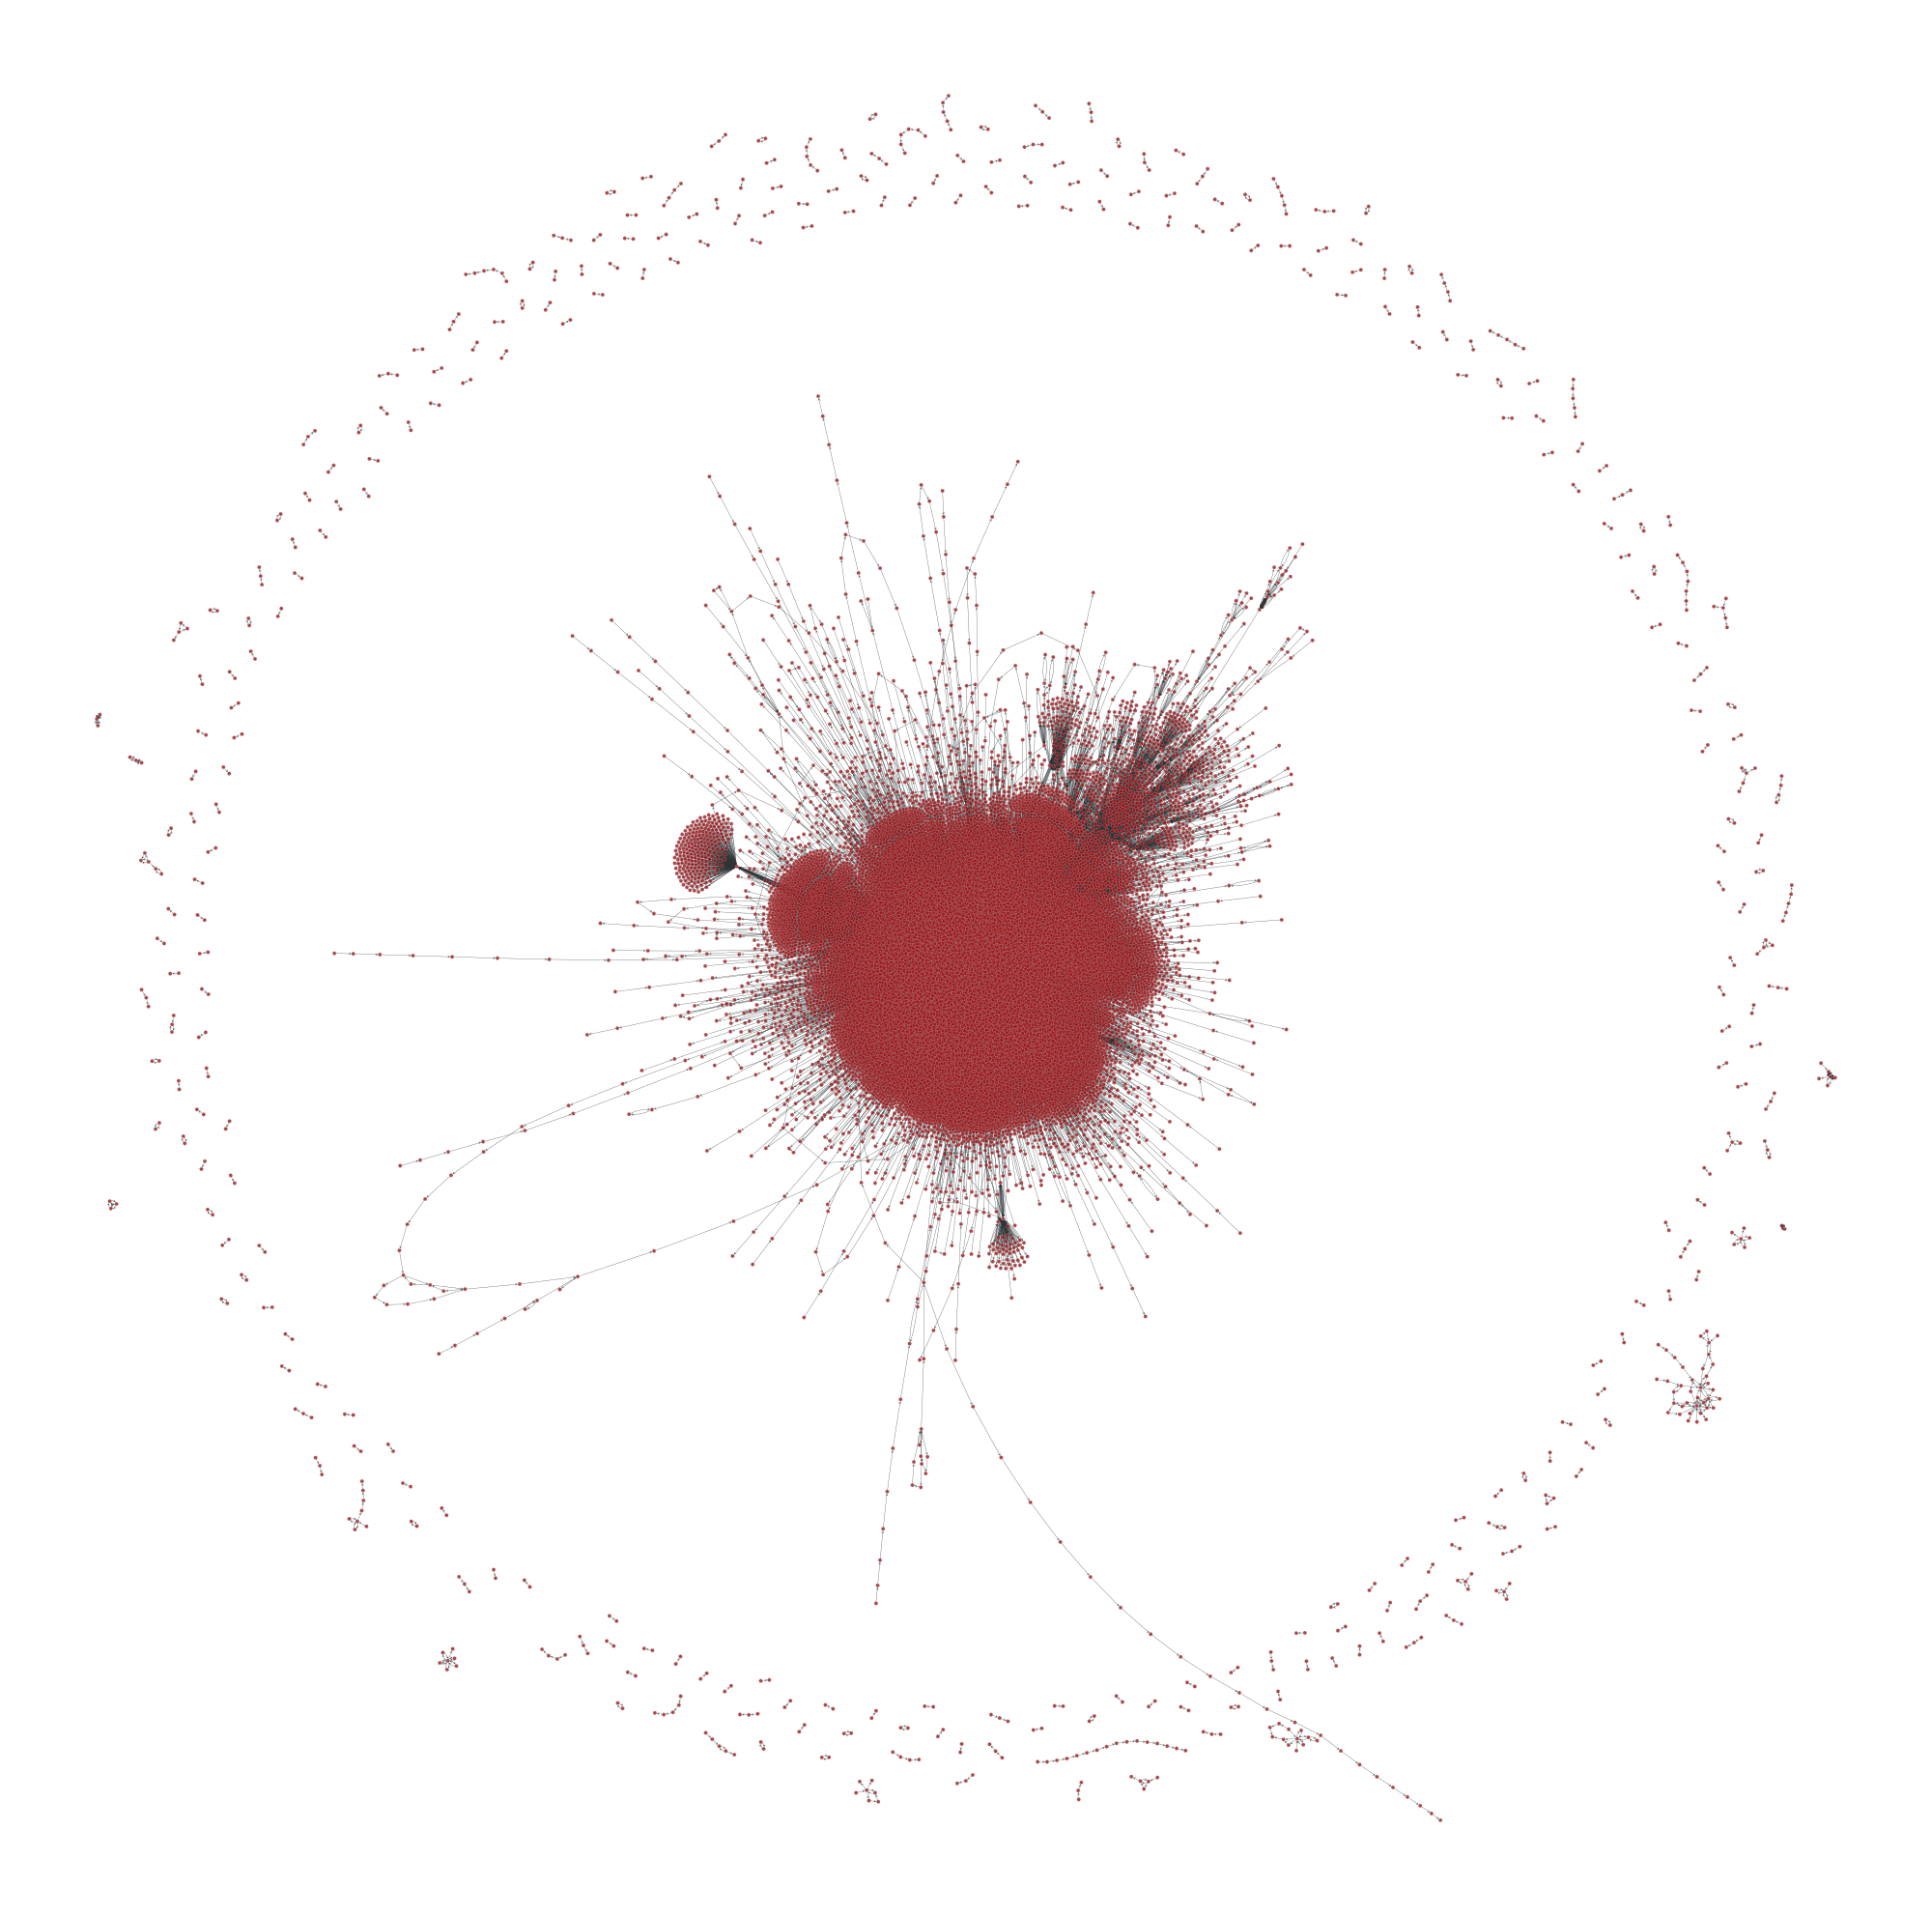

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x28d449d60, at 0x28fface90>

In [5]:
gt.graph_draw(graph,output_size = (1000, 1000))

En regardant le graphe précédent avec gephi, on remarque qu'il n'y a que 57 organisations présentes. On essaie de trouver celle qui manque.

In [8]:
data = loadingFiles(os.path.join(os.getcwd(), "NumFocus_Raw_Data_Youness"))

Reading files: 100%|██████████| 18/18 [01:52<00:00,  6.25s/it]


In [9]:
dataId = loadingFiles(os.path.join(os.getcwd(), "NumFocus_Raw_Data_Youness"), addMoreIdColumns)

Adding id columns: 100%|██████████| 1003229/1003229 [03:03<00:00, 5465.75it/s]


In [48]:
s = set()
for e in graph.edges():
    s.add(graph.ep['org_name'][e])
    if len(s) == 57:
        break

In [49]:
for org in data['org_name'].unique():
    if org not in s:
        print(org)

petsc


In [50]:
petscId = dataId[dataId['org_name'] == 'petsc']
petsc = data[data['org_name'] == 'petsc']

In [41]:
petsc['type'].value_counts()

type
PushEvent                 1603
WatchEvent                 103
ForkEvent                   37
CreateEvent                 26
PullRequestEvent            17
DeleteEvent                  2
IssueCommentEvent            2
PullRequestReviewEvent       1
Name: count, dtype: int64

In [51]:
petscId['type'].value_counts()

type
PullRequestEvent          17
IssueCommentEvent          2
PullRequestReviewEvent     1
Name: count, dtype: int64

In [42]:
petsc['actor_name'].value_counts()

actor_name
petscbot            1625
dham                   8
dalcinl                6
dependabot[bot]        4
balay                  4
                    ... 
HaoweiZhangIntel       1
firedrakeproject       1
AdelekeBankole         1
fjosw                  1
sanjoymazumder13       1
Name: count, Length: 137, dtype: int64

In [52]:
petscId['actor_name'].value_counts()

actor_name
dham               8
dalcinl            4
balay              2
dependabot[bot]    2
knepley            2
JDBetteridge       1
connorjward        1
Name: count, dtype: int64

In [53]:
petscId[petscId['type'] == 'IssueCommentEvent']

type  public  \
140632  IssueCommentEvent    True   
78897   IssueCommentEvent    True   

                                                  payload          created_at  \
140632  {"action":"created","issue":{"url":"https://ap... 2023-03-29 14:59:06   
78897   {"action":"created","issue":{"url":"https://ap... 2024-01-11 18:58:59   

                 id                                other  actor_id actor_name  \
140632  28065201874  {"actor":{"display_login":"balay"}}   5642668      balay   
78897   34757880878  {"actor":{"display_login":"balay"}}   5642668      balay   

        repo_id    repo_name   org_id org_name    issue_id pull_request_id  \
140632  8691401  petsc/petsc  3119012    petsc  1645299703            None   
78897   8691401  petsc/petsc  3119012    petsc  2077378561            None   

       review_id  
140632      None  
78897       None

In [57]:
petscId[petscId['type'].isin(['PullRequestEvent', 'PullRequestReviewEvent'])].sort_values(by = 'pull_request_id')

type  public  \
89388         PullRequestEvent    True   
89390         PullRequestEvent    True   
133479        PullRequestEvent    True   
133867        PullRequestEvent    True   
133882        PullRequestEvent    True   
134474        PullRequestEvent    True   
134477        PullRequestEvent    True   
135468        PullRequestEvent    True   
136298        PullRequestEvent    True   
136296        PullRequestEvent    True   
139247        PullRequestEvent    True   
139249        PullRequestEvent    True   
139740        PullRequestEvent    True   
78860         PullRequestEvent    True   
84192         PullRequestEvent    True   
117893  PullRequestReviewEvent    True   
117895        PullRequestEvent    True   
91055         PullRequestEvent    True   

                                                  payload          created_at  \
89388   {"action":"opened","number":13,"pull_request":... 2023-03-17 22:20:56   
89390   {"action":"closed","number":13,"pull_request":... 2023-03-17 22:21:18   
133479  {"action":"closed","number":14,"pull_request":... 2023-03-28 08:06:54   
133867  {"action":"opened","number":15,"pull_request":... 2023-03-28 09:56:40   
133882  {"action":"closed","number":15,"pull_request":... 2023-03-28 10:00:55   
134474  {"action":"opened","number":17,"pull_request":... 2023-03-28 12:47:19   
134477  {"action":"closed","number":17,"pull_request":... 2023-03-28 12:47:57   
135468  {"action":"closed","number":18,"pull_request":... 2023-03-28 15:58:17   
136298  {"action":"closed","number":19,"pull_request":... 2023-03-28 18:21:19   
136296  {"action":"opened","number":19,"pull_request":... 2023-03-28 18:21:12   
139247  {"action":"opened","number":20,"pull_request":... 2023-03-29 08:40:00   
139249  {"action":"closed","number":20,"pull_request":... 2023-03-29 08:40:08   
139740  {"action":"opened","number":21,"pull_request":... 2023-03-29 11:02:58   
78860   {"action":"opened","number":22,"pull_request":... 2024-01-11 18:49:06   
84192   {"action":"closed","number":22,"pull_request":... 2024-01-12 14:57:44   
117893  {"action":"created","review":{"id":1888243043,... 2024-02-19 11:57:28   
117895  {"action":"closed","number":23,"pull_request":... 2024-02-19 11:57:38   
91055   {"action":"opened","number":24,"pull_request":... 2024-05-14 12:52:19   

                 id                                       other  actor_id  \
89388   27808059896          {"actor":{"display_login":"dham"}}    848103   
89390   27808064799          {"actor":{"display_login":"dham"}}    848103   
133479  28024295184  {"actor":{"display_login":"JDBetteridge"}}  43041811   
133867  28027254149       {"actor":{"display_login":"dalcinl"}}    294981   
133882  28027369882       {"actor":{"display_login":"dalcinl"}}    294981   
134474  28031662586          {"actor":{"display_login":"dham"}}    848103   
134477  28031680059          {"actor":{"display_login":"dham"}}    848103   
135468  28037442848          {"actor":{"display_login":"dham"}}    848103   
136298  28040803560       {"actor":{"display_login":"dalcinl"}}    294981   
136296  28040800934       {"actor":{"display_login":"dalcinl"}}    294981   
139247  28054772700          {"actor":{"display_login":"dham"}}    848103   
139249  28054776141          {"actor":{"display_login":"dham"}}    848103   
139740  28058566527          {"actor":{"display_login":"dham"}}    848103   
78860   34757645904    {"actor":{"display_login":"dependabot"}}  49699333   
84192   34782268776    {"actor":{"display_login":"dependabot"}}  49699333   
117893  35796142728       {"actor":{"display_login":"knepley"}}    583817   
117895  35796147662       {"actor":{"display_login":"knepley"}}    583817   
91055   38361058712   {"actor":{"display_login":"connorjward"}}  32702482   

             actor_name  repo_id    repo_name   org_id org_name issue_id  \
89388              dham  8691401  petsc/petsc  3119012    petsc     None   
89390              dham  8691401  petsc/petsc  3119012    petsc     Non

On remarque que pour chaque évènement différent, le seul 'contributeur' de l'évènement est la personne qui a créé l'évènement. Cela explique cette organisation ne se trouve pas dans le graphe final.

### Ajout d'information sur les arrêtes

In [15]:
g = gt.load_graph(os.path.join(os.getcwd(), 'graphAllEvent.graphml'))

In [12]:
dicoData = {'2023-01': None, '2023-02': None, '2023-03': None, '2023-04': None, '2023-05': None, '2023-06': None, '2023-07': None, '2023-08': None, '2023-09': None, '2023-10': None, '2023-11': None, '2023-12': None, '2024-01': None, '2024-02': None, '2024-03': None, '2024-04': None, '2024-05': None, '2024-06': None}

for file in os.listdir(os.path.join(os.getcwd(), 'NumFocus_Raw_Data_Youness')):
    data = loadingFiles(os.path.join(os.getcwd(), 'NumFocus_Raw_Data_Youness', file), addMoreIdColumns)
    allDate = file.replace('.json', '').replace('gh_events_', '')
    dicoData[f'{allDate[:4]}-{allDate[4:]}'] = data

Adding id columns: 100%|██████████| 55383/55383 [00:03<00:00, 13920.78it/s]


In [7]:
dataId = loadingFiles(os.path.join(os.getcwd(), "NumFocus_Raw_Data_Youness"), addMoreIdColumns)

Reading files: 100%|██████████| 18/18 [05:00<00:00, 16.72s/it]


In [18]:
def findIndexInDataFrame(df : pd.DataFrame, g : gt.Graph, e : gt.Edge) -> int:
    """
    Find the index of the row in the dataframe that corresponds to the edge e in the graph
    """
    source = g.vp['actor_name'][e.source()]
    

    return df[(df['actor_name'] == source) & (df['created_at'] == g.ep['event_date'][e] + ' ' + g.ep['time'][e]) & (df['type'] == g.ep['event_type'][e]) & (df['org_name'] == g.ep['org_name'][e]) & (df['repo_name'] == g.ep['repo_name'][e])]
  

On rajoute aussi le mois et l'année (afin de pouvoir filtrer sur un mois et une année plutôt que seulement un jour spécifique)

In [ ]:
g.ep['year-month'] = g.new_edge_property('string')
for e in tqdm(g.edges(), total= len(list(g.edges()))):
    g.ep['year-month'][e] = g.ep['event_date'][e][:7]

On commence par rajouter le "type" d'id (i.e pull_request, review ou issue) qu'est id_event.

In [21]:
g.ep['id_type'] = g.new_edge_property('string')
count = len(list(g.edges()))
for e in tqdm(g.edges(), total= len(list(g.edges()))) :
    
    if g.ep['event_type'][e] in ['IssueCommentEvent', 'IssuesEvent']:
        g.ep['id_type'][e] = 'issue_id'
        count -= 1
    elif g.ep['event_type'][e] == 'PullRequestEvent':
        g.ep['id_type'][e] = 'pull_request_id'
        count -= 1
    else :
        year_month = g.ep['year-month'][e]
        df = dicoData[year_month]
        row = findIndexInDataFrame(df, g, e)

        if row['review_id'].iloc[0] is not None and row['review_id'].iloc[0] == g.ep['id_event'][e]:
            g.ep['id_type'][e] = 'review_id'
        else :
            g.ep['id_type'][e] = 'pull_request_id'


        

100%|██████████| 367094/367094 [1:05:06<00:00, 93.98it/s]   


On rajoute également l'url github de l'évènement

In [33]:
g.ep['event_url'] = g.new_edge_property('string')
for e in tqdm(g.edges(), total= len(list(g.edges()))):
    df = dicoData[g.ep['year-month'][e]]
    payload = json.loads(df[df[g.ep['id_type'][e]] == g.ep['id_event'][e]]['payload'].iloc[0])
    if g.ep['id_type'][e] == 'issue_id':
        g.ep['event_url'][e] = payload['issue']['html_url']
    else :
        g.ep['event_url'][e] = payload['pull_request']['html_url']

100%|██████████| 367094/367094 [25:22<00:00, 241.13it/s]


In [35]:
g.save(os.path.join(os.getcwd(), 'graphAllEvent.graphml'))

### Ajout d'informations dans les noeuds

On aimerait rajouter dans les noeuds les élèments suivants:
- Le nombre d'évènements différent auquel quelqu'un a participé 
- Le nombre et le noms des organisations dans lesquels cette personne est active (par les évènements seulement)
- Le nombre de et le nom des dépots dans lesquels cette personne est active (par les évènements seulement)

In [11]:
def filterDataset(df : pd.DataFrame, g : gt.Graph) -> pd.DataFrame:
    """
    Remove the rows linked to an event that is not in the graph and for each different event, for each contributor, keep only the first event.
    """
    data =  df[df['pull_request_id'].isin(list(g.ep['id_event'])) | df['review_id'].isin(list(g.ep['id_event'])) | df['issue_id'].isin(list(g.ep['id_event']))]
    data = data.sort_values(by = 'actor_name')
    return data.drop_duplicates(subset = ['actor_name', 'pull_request_id', 'review_id', 'issue_id'], keep = 'first')

In [12]:
def addInformationNodes(df : pd.DataFrame, g : gt.Graph) -> gt.Graph:
    """
    Add information to the nodes in the graph
    """
    data = filterDataset(df, g)
    g.vp['Num_events_in'] = g.new_vertex_property('int')
    g.vp['Events_in_type'] = g.new_vertex_property('string')
    g.vp['Num_org_in'] = g.new_vertex_property('int')
    g.vp['Num_repo_in'] = g.new_vertex_property('int')
    g.vp['Name_org_in'] = g.new_vertex_property('string')
    g.vp['Name_repo_in'] = g.new_vertex_property('string')
    for v in tqdm(g.vertices(), total = len(list(g.vertices()))):
        data_actor = data[data['actor_name'] == g.vp['actor_name'][v]]
        g.vp['Num_events_in'][v] = len(data_actor)
        g.vp['Events_in_type'][v] = str(data_actor['type'].value_counts().to_dict())
        g.vp['Num_org_in'][v] = len(data_actor['org_name'].unique())
        g.vp['Num_repo_in'][v] = len(data_actor['repo_name'].unique())
        g.vp['Name_org_in'][v] = str(data_actor['org_name'].value_counts().to_dict())
        g.vp['Name_repo_in'][v] = str(data_actor['repo_name'].value_counts().to_dict())
    return g
        
        
    

In [24]:
data = loadingFiles(os.path.join(os.getcwd(), "NumFocus_Raw_Data_Youness"), addMoreIdColumns)

Reading files: 100%|██████████| 18/18 [04:46<00:00, 15.90s/it]


In [84]:
gTest = addInformationNodes(data, g)

100%|██████████| 24829/24829 [48:42<00:00,  8.50it/s] 


In [97]:
gTest.save(os.path.join(os.getcwd(), 'graphAllEvent.graphml'))

On va également rajouter un peu plus d'information sur le type d'utilisateurs (information se trouvant dans un autre fichier). 

In [3]:
dataUser =pd.read_csv(os.path.join(os.getcwd(), "numfocus_user_types.csv"))

In [6]:
dataUser

Unnamed: 0          contributor events activities   NA  NT NOR    ORR  \
0               0           ccordoba12    254        195  195  12  11  0.733   
1               1  github-actions[bot]      -          -    -   -   -      -   
2               2          vercel[bot]      -          -    -   -   -      -   
3               3                mem48     90         85   85   9   6  0.545   
4               4              dmbelov      0          0    -   -   -      -   
...           ...                  ...    ...        ...  ...  ..  ..    ...   
98366       98366         NicolasDortu     91         91   91   5  18    0.6   
98367       98367           bobbyocean      3          3    3   2   2    1.0   
98368       98368           nicmostert     94         77   77  11   3   0.75   
98369       98369             notail23      6          6    6   4   2    1.0   
98370       98370               Jmw150      3          3    3   2   3    1.0   

      DCA_mean DCA_median  ... DCAT_std DCAT_gini DCAT_IQR NAT_mean  \
0         1.87      0.063  ...    5.642      0.84    1.115    16.25   
1            -          -  ...        -         -        -        -   
2            -          -  ...        -         -        -        -   
3       25.254       0.69  ...   34.256     0.716   27.589    9.444   
4            -          -  ...        -         -        -        -   
...        ...        ...  ...      ...       ...      ...      ...   
98366   18.626      0.086  ...   76.694     0.802   19.489     18.2   
98367  582.717    582.717  ...  763.508     0.463  539.882      1.5   
98368   25.593      0.106  ...  149.644      0.94     0.91      7.0   
98369   68.783      0.051  ...  198.305     0.667  171.738      1.5   
98370  574.889    574.889  ...      0.0       0.0      0.0      1.5   

      NAT_median NAT_std NAT_gini NAT_IQR     type confidence  
0            9.5  15.598    0.498    24.5    human       0.95  
1              -       -        -       -      bot        1.0  
2              -       -        -       -      bot        1.0  
3            7.0  15.923     0.63     7.0    human      0.912  
4              -       -        -       -  unknown          -  
...          ...     ...      ...     ...      ...        ...  
98366       10.0  19.409    0.479     9.0    human      0.605  
98367        1.5   0.707    0.167     0.5  unknown          -  
98368        4.0   8.695    0.529     4.5    human      0.945  
98369        1.0     1.0     0.25     0.5    human      0.771  
98370        1.5   0.707    0.167     0.5  unknown          -  

[98371 rows x 44 columns]

In [14]:
def addInformationUser(df : pd.DataFrame, g : gt.Graph) -> gt.Graph:
    """
    Add information about the user to the graph
    """
    #data = df[df['contributor'].isin(g.vp['actor_name'].a)]
    g.vp['User_type'] = g.new_vertex_property('string')
    g.vp['Confidence'] = g.new_vertex_property('string')
    for v in tqdm(g.vertices(), total = len(list(g.vertices()))):
        user = df[df['contributor'] == g.vp['actor_name'][v]]
        g.vp['User_type'][v] = user['type'].iloc[0]
        g.vp['Confidence'][v] = user['confidence'].iloc[0]
    return g

In [9]:
g = gt.load_graph(os.path.join(os.getcwd(), 'graphAllEvent.graphml'))

In [15]:
gUser = addInformationUser(dataUser, g)

  0%|          | 0/24829 [00:00<?, ?it/s]

100%|██████████| 24829/24829 [04:02<00:00, 102.48it/s]


In [ ]:
del gUser.vp['bot']

In [19]:
gUser.save(os.path.join(os.getcwd(), 'graphAllEvent.graphml'))

### Génération de graph avec d'autres stratégies

On aimerait désormais voir à quel point la stratégie pour relier les noeuds influence la forme du graphe.

Pour tester cela, on va dans un premier temps se mettre dans le cadre d'un graphe avec les donnée d'une organisation

La première stratégie vise à relier tous les contributeurs ayant participé au même évènement.

In [13]:
def stratHyperConnected(g : gt.Graph, data : pd.DataFrame, event_type : str, val : str) -> gt.Graph:
    """
    We link all the contributors who have worked on the same event.
    """
    if len(data[data[event_type] == val]["actor_name"].value_counts()) > 1:
        tmp = data[data[event_type] == val]
        tmp = tmp.sort_values(by = 'created_at')

        for i in range(0, len(tmp)):
            if tmp.iloc[i]['actor_name'] not in g.gp.vmap:
                v = g.add_vertex()
                g = addPropVertices(g, v, tmp.iloc[i])
            for j in range(0, i):
                v1 = g.vertex(g.gp.vmap[tmp.iloc[i]['actor_name']])
                v2 = g.vertex(g.gp.vmap[tmp.iloc[j]['actor_name']])
                if g.vp['actor_name'][v1] == g.vp['actor_name'][v2]:
                    continue
                else :
                    ed1 = g.edge(v1, v2)
                    ed2 = g.edge(v2, v1)

                    if ed1 is None or g.ep['id_event'][ed1] != val:
                        e1 = g.add_edge(v1, v2)
                        g = addPropEdge(g, e1, tmp.iloc[j], val, event_type)
                    else : 
                        g.ep['weight'][ed1] += 1
                    if ed2 is None or g.ep['id_event'][ed2] != val:
                        e2 = g.add_edge(v2, v1)
                        g = addPropEdge(g, e2, tmp.iloc[i], val, event_type)
                    else : 
                        g.ep['weight'][ed2] += 1
    return g
        

Pour la deuxième approche, on relie d'une flèche un contributeur A vers un contributeur B si A a contribué après B sur un même évènement. Ainsi, la dernière personne à avoir contribué sur un évènement sera relié à toutes les autres

In [14]:
def stratSemiConnected(g : gt.Graph, data : pd.DataFrame, event_type : str, val : str) -> gt.Graph:
    """
    Each contributor is linked to all the previous ones who have worked on the same event.
    """
    if len(data[data[event_type] == val]["actor_name"].value_counts()) > 1:
        tmp = data[data[event_type] == val]
        tmp = tmp.sort_values(by = 'created_at')

        for i in range(0, len(tmp)):
            if tmp.iloc[i]['actor_name'] not in g.gp.vmap:
                v = g.add_vertex()
                g = addPropVertices(g, v, tmp.iloc[i])
            for j in range(0, i):
                v1 = g.vertex(g.gp.vmap[tmp.iloc[i]['actor_name']])
                v2 = g.vertex(g.gp.vmap[tmp.iloc[j]['actor_name']])
                if g.vp['actor_name'][v1] == g.vp['actor_name'][v2]:
                    continue
                else :
                    ed1 = g.edge(v1, v2)
                    if ed1 is None or g.ep['id_event'][ed1] != val:
                        e1 = g.add_edge(v1, v2)
                        g = addPropEdge(g, e1, tmp.iloc[j], val, event_type)
                    else : 
                        g.ep['weight'][ed1] += 1
                   
    return g
        

Voici un aperçu des différentes stratégies sur un exemple facile. Si on suppose avoir 3 personnes ayant contribué sur les 3 évènements au dates suivantes :
| Personne | Date | 
|---------|-------|
| A | 6 Septembre |
| B | 5 Septembre | 
| C | 4 Septembre | 

On génère les 3 graphes

In [9]:
g0 = gt.Graph(directed = True)
g1 = gt.Graph(directed = True)
g2 = gt.Graph(directed = True)

In [10]:
for g in [g0, g1, g2]:
    g.vp['actor_name'] = g.new_vertex_property('string')

    A = g.add_vertex()
    B = g.add_vertex()
    C = g.add_vertex()

    g.vp['actor_name'][A] = 'A'
    g.vp['actor_name'][B] = 'B'
    g.vp['actor_name'][C] = 'C'

In [11]:
g0.add_edge(A, B)
g0.add_edge(B, C)

g1.add_edge(A, B)
g1.add_edge(B, A)
g1.add_edge(B, C)
g1.add_edge(C, B)
g1.add_edge(C, A)
g1.add_edge(A, C)

g2.add_edge(A, B)
g2.add_edge(A, C)
g2.add_edge(B, C)

<Edge object with source '1' and target '2' at 0x282482290>

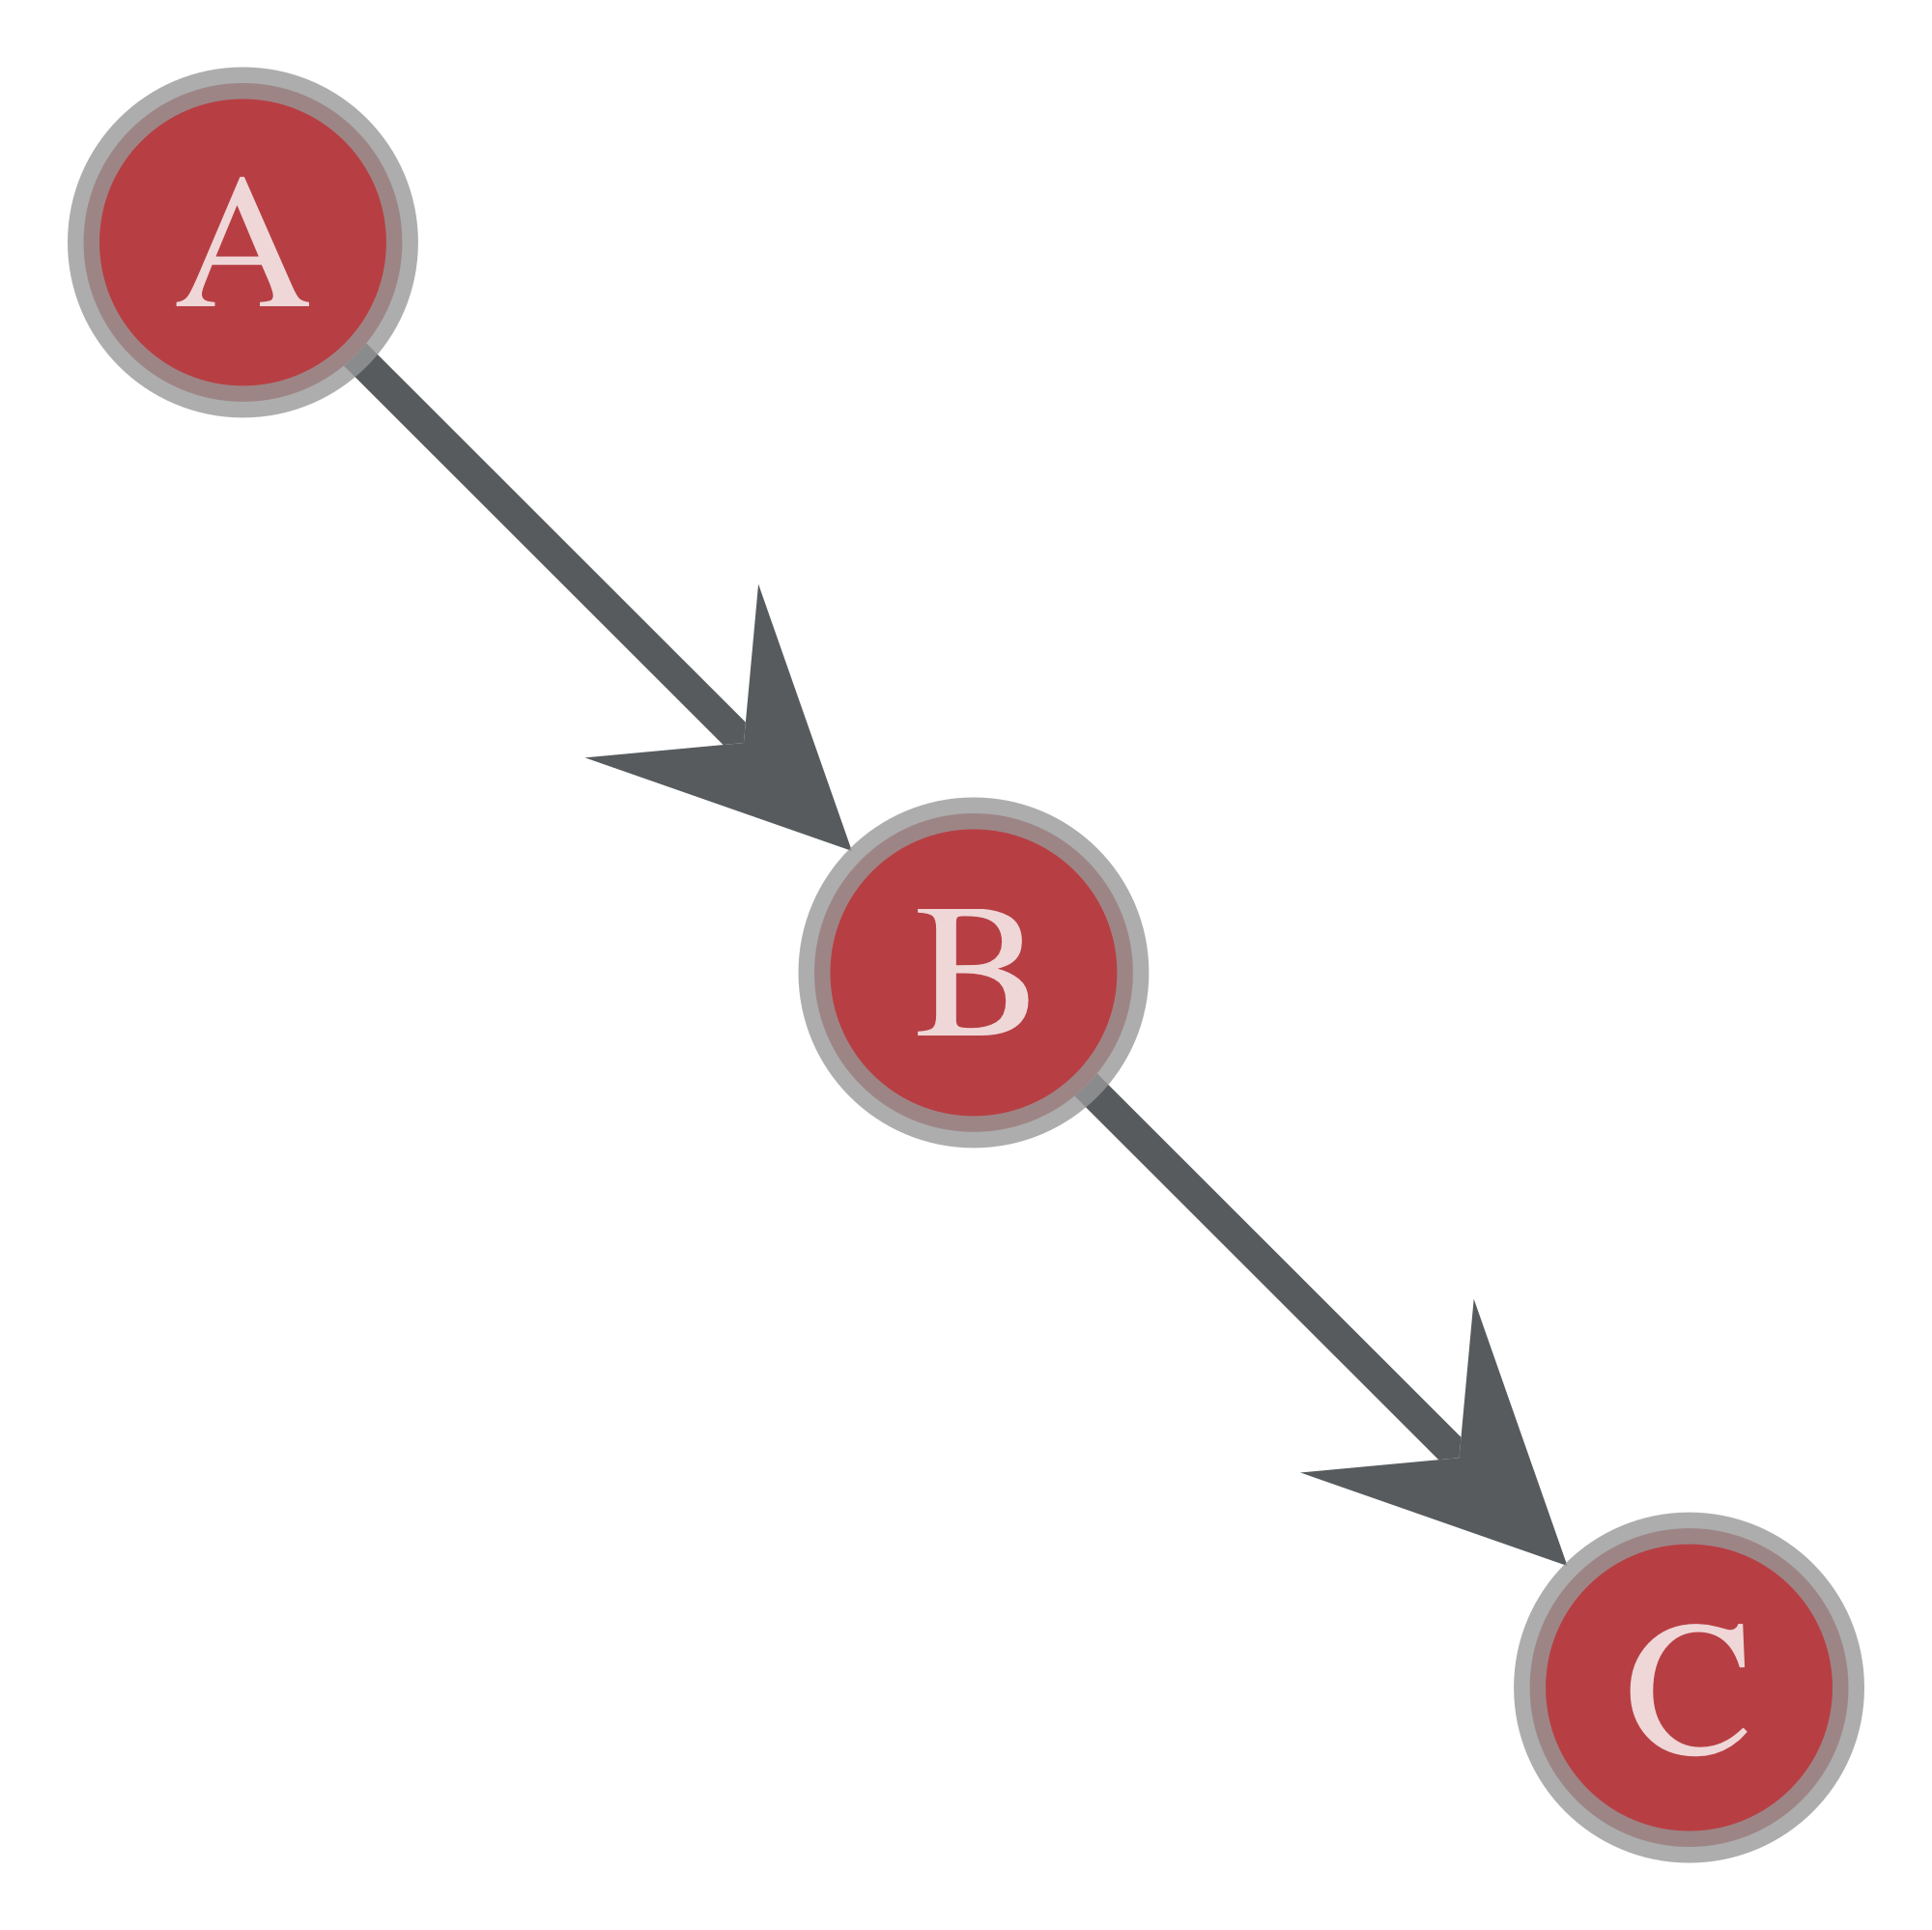

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x103922f60, at 0x2838b8350>

In [19]:
gt.graph_draw(g0, vertex_text = g0.vp['actor_name'], output_size = (1000, 1000))


In [20]:
pos = gt.sfdp_layout(g0)

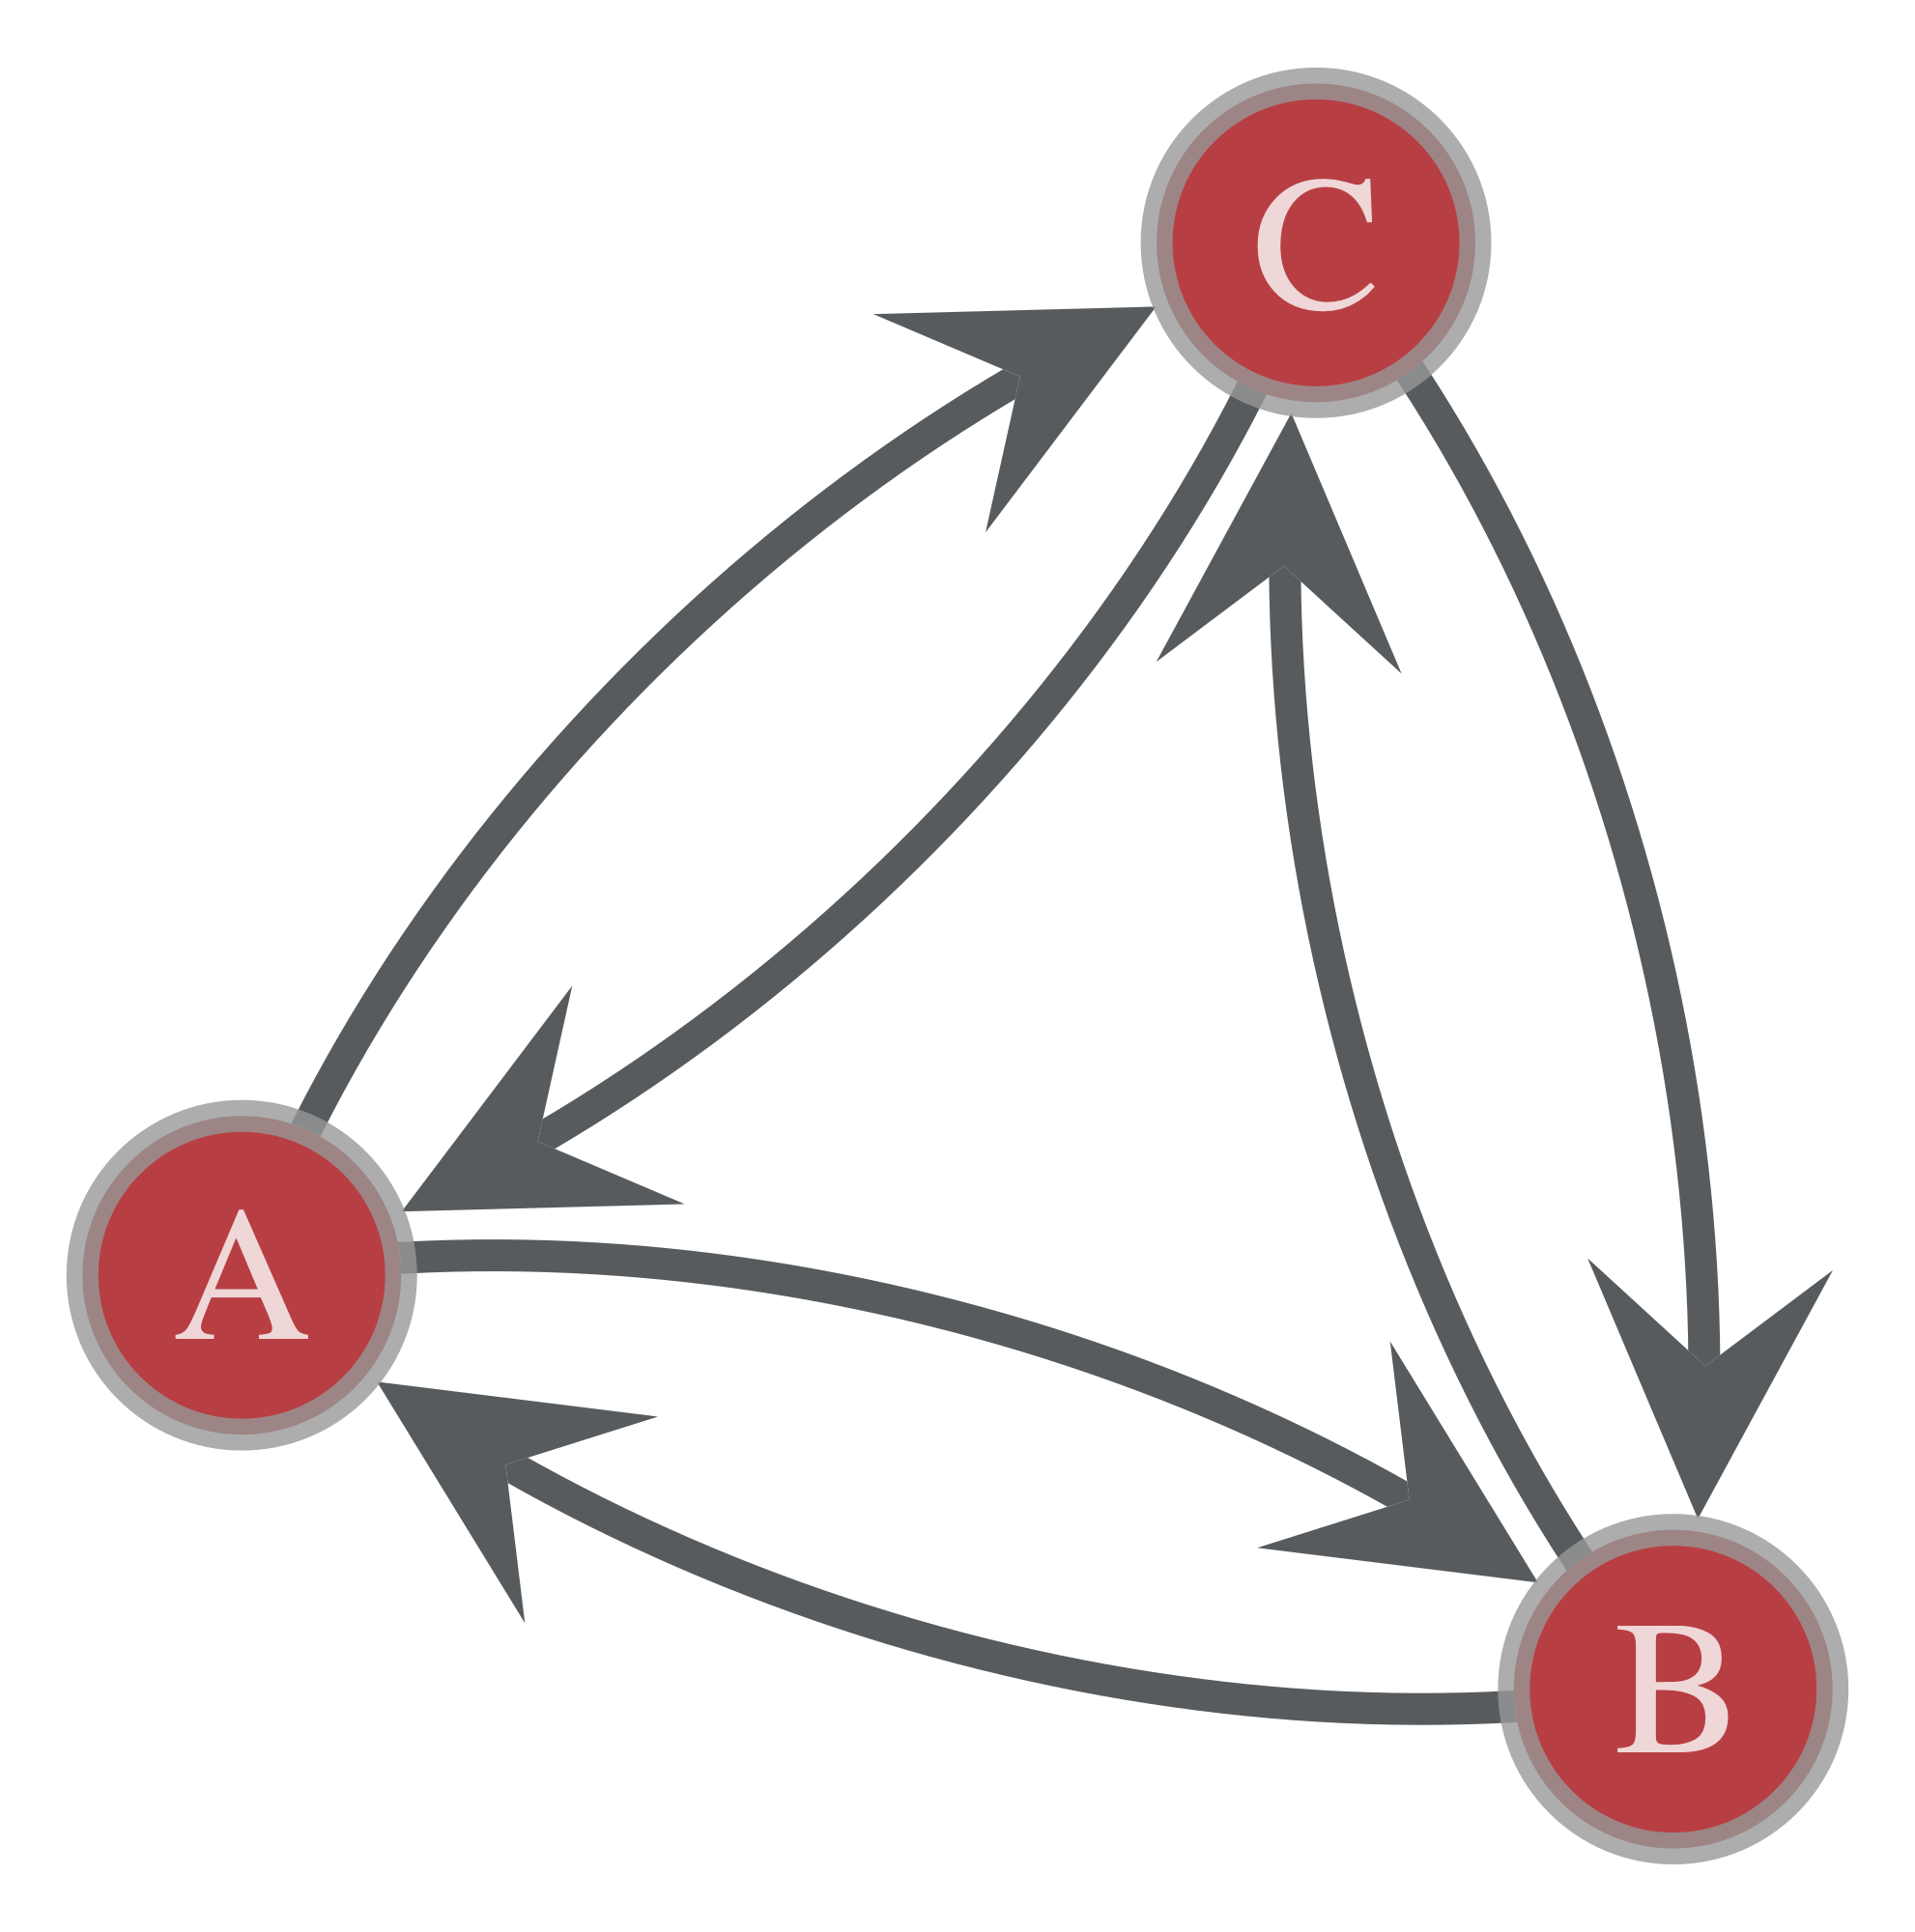

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x156d2c2c0, at 0x156d445c0>

In [13]:
gt.graph_draw(g1, vertex_text = g1.vp['actor_name'], output_size = (1000, 1000))

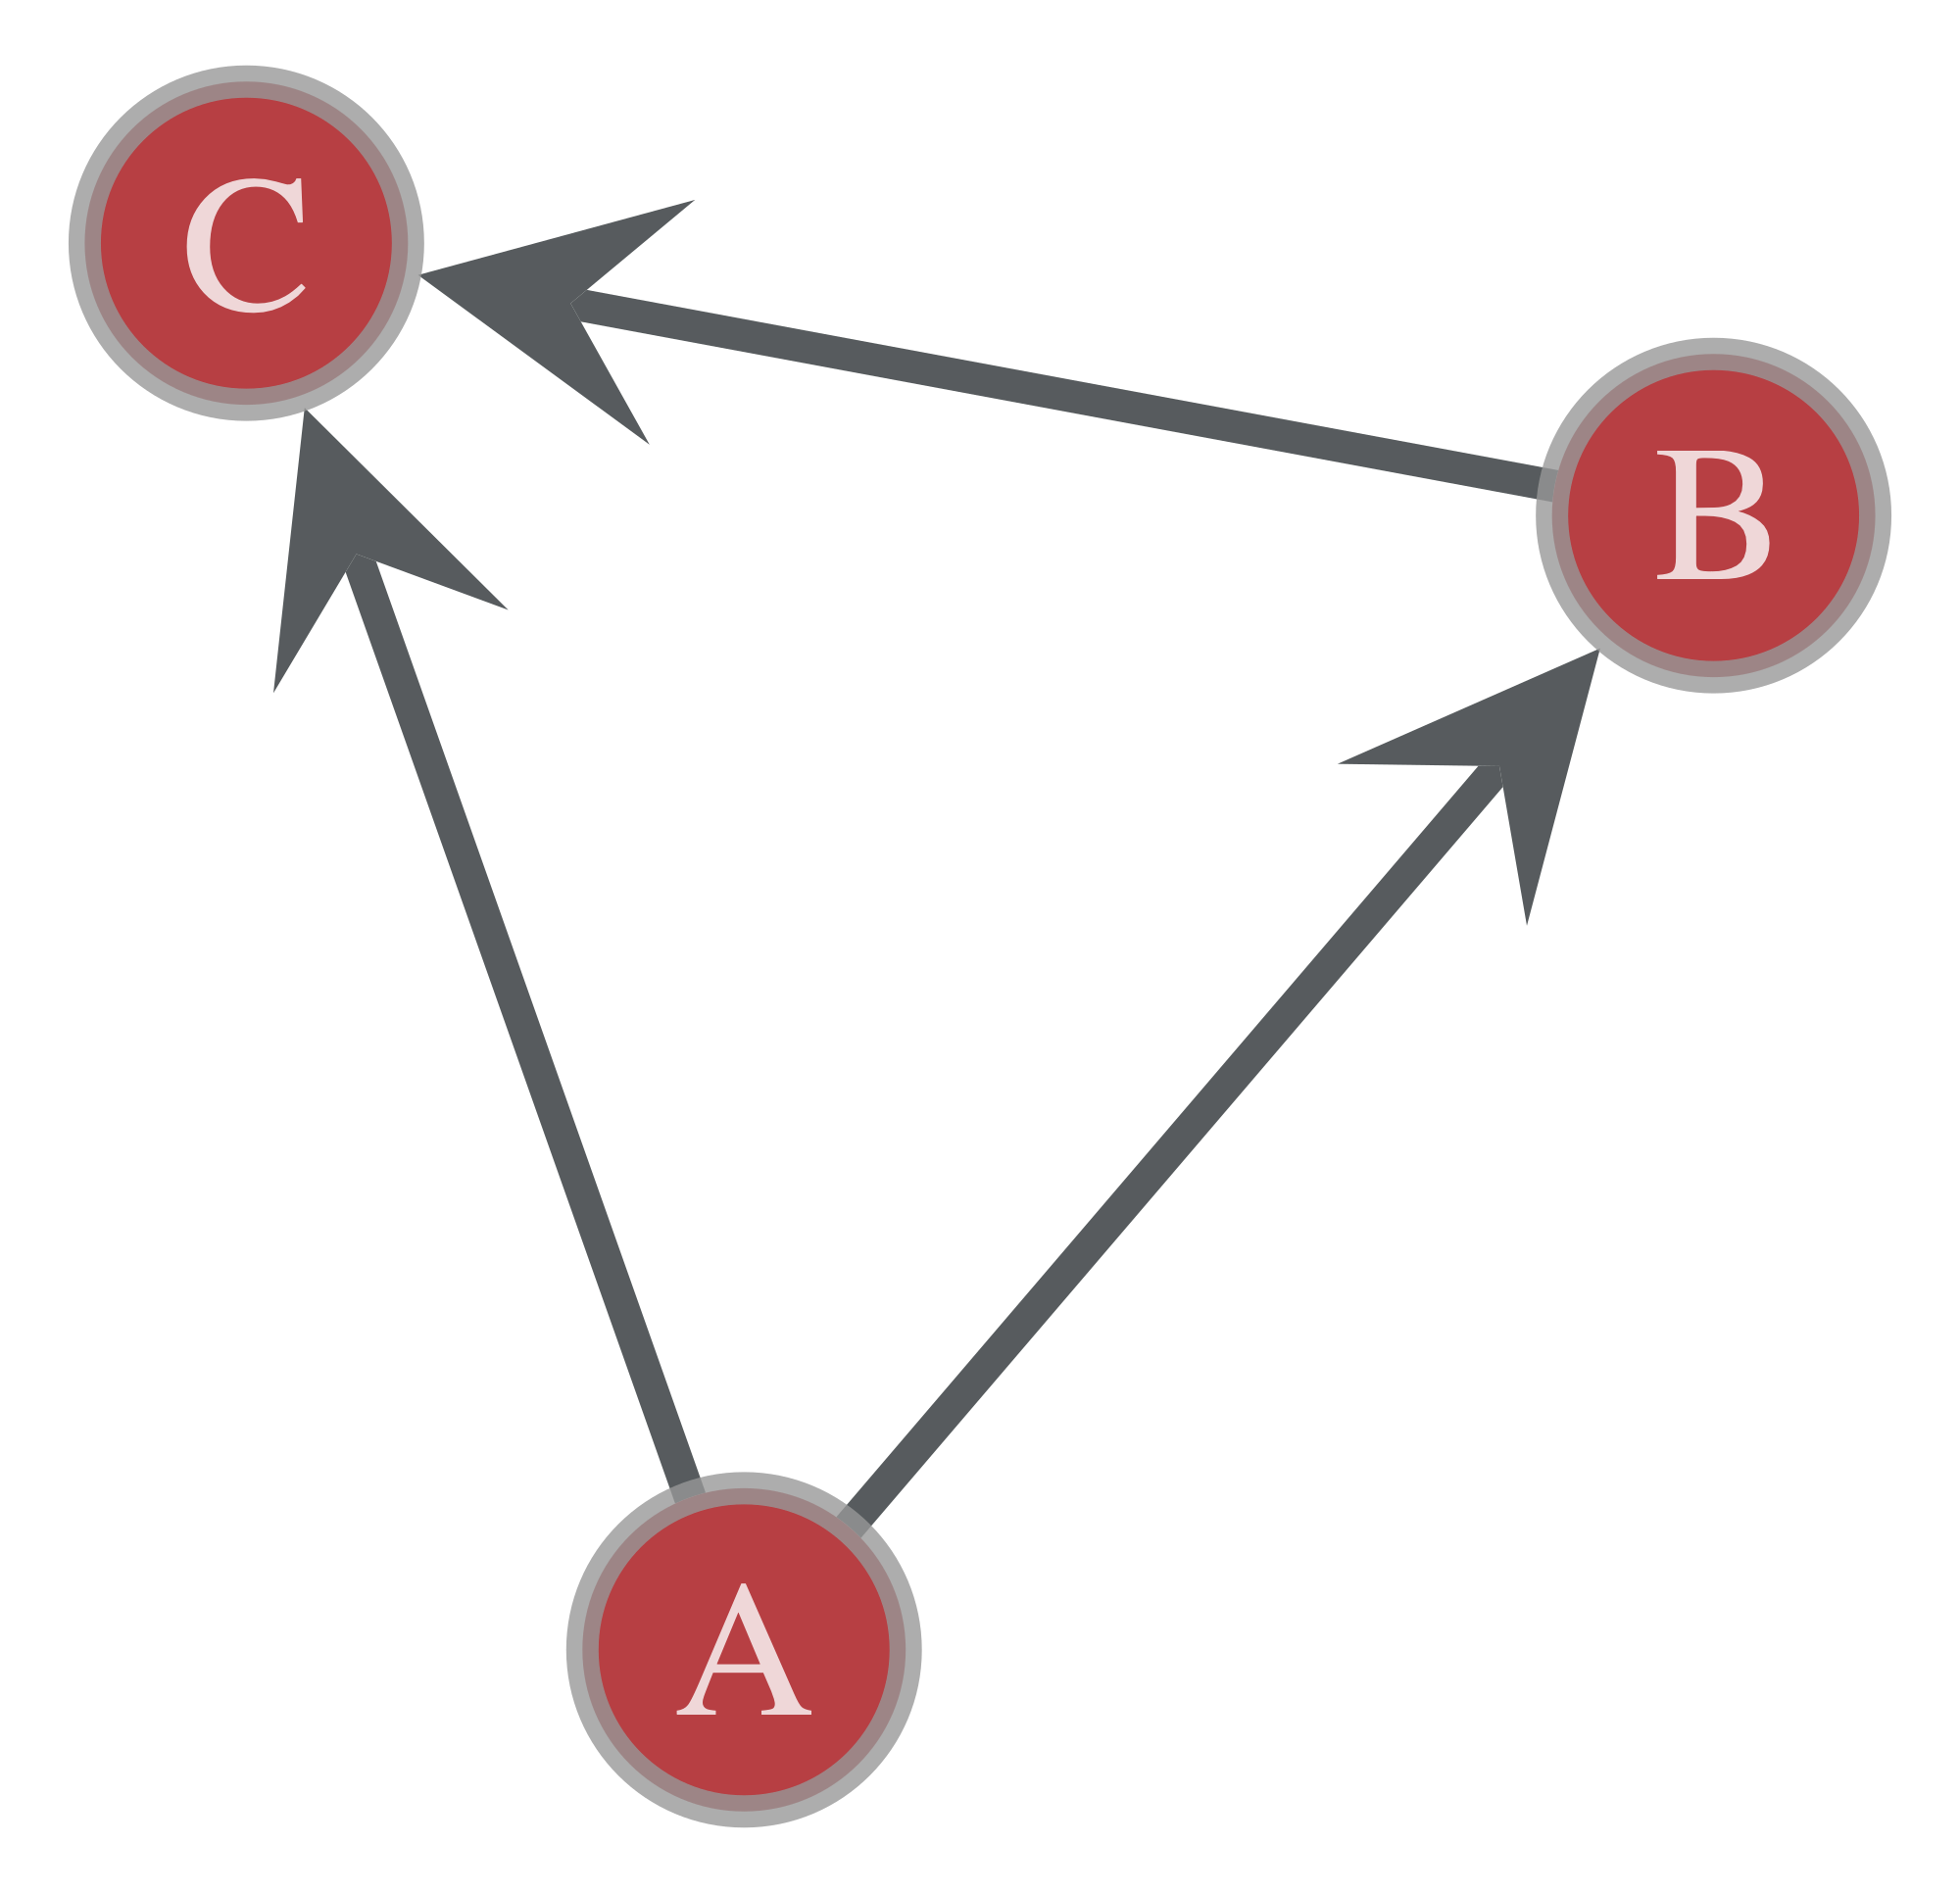

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2823e4710, at 0x2838b7e30>

In [23]:

gt.graph_draw(g2, vertex_text = g2.vp['actor_name'], output_size = (1000, 1000))

In [24]:
g0.save(os.path.join(os.getcwd(), 'graphExample', 'strat0.graphml'))
g1.save(os.path.join(os.getcwd(), 'graphExample', 'strat1.graphml'))
g2.save(os.path.join(os.getcwd(), 'graphExample', 'strat2.graphml'))

On essaye les différentes stratégie sur l'organisation matplotlib

In [ ]:
g = createGraphAllEvent(data, organisation = 'matplotlib')

g.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'naive_strat', 'graphMatplotlibNaiveStrat.graphml'))

In [45]:
g = createGraphAllEvent(data, stratHyperConnected, 'matplotlib')
g.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'hyper_connected_strat', 'graphMatplotlibHyperConnected.graphml'))

Creating graph for issue_id: 100%|██████████| 4501/4501 [00:22<00:00, 198.48it/s]


In [41]:
g = createGraphAllEvent(data, stratSemiConnected, 'matplotlib')
g.save(os.path.join(os.getcwd(),'graph_matplotlib' , 'semi_connected_strat', 'graphMatplotlibSemiConnected.graphml'))

Creating graph for issue_id: 100%|██████████| 4501/4501 [00:19<00:00, 228.94it/s]


### Analyse des 3 stratégies différentes

In [28]:
g0 = gt.load_graph(os.path.join(os.getcwd(), 'graph_matplotlib', 'naive_strat',  'graphMatplotlibNaiveStrat.graphml'))
g1 = gt.load_graph(os.path.join(os.getcwd(), 'graph_matplotlib', 'hyper_connected_strat','graphMatplotlibHyperConnected.graphml'))
g2 = gt.load_graph(os.path.join(os.getcwd(),'graph_matplotlib' , 'semi_connected_strat',  'graphMatplotlibSemiConnected.graphml'))

In [29]:
g0.num_edges(), g1.num_edges(), g2.num_edges()

(14200, 169734, 87127)

<Axes: >

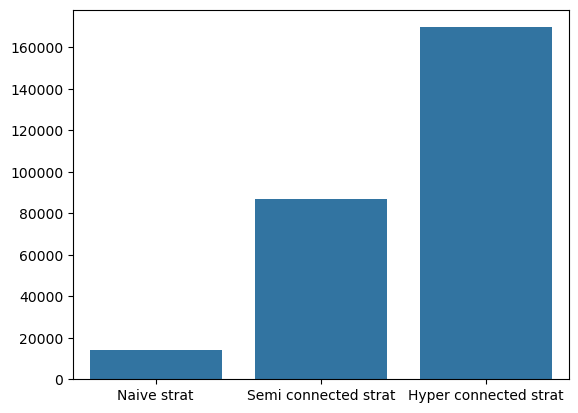

In [31]:
sns.barplot(x = ['Naive strat', 'Hyper connected strat', 'Semi connected strat'], y = [g0.num_edges(), g1.num_edges(), g2.num_edges()], order = ['Naive strat', 'Semi connected strat', 'Hyper connected strat'], )


#### Comparaison visuelle

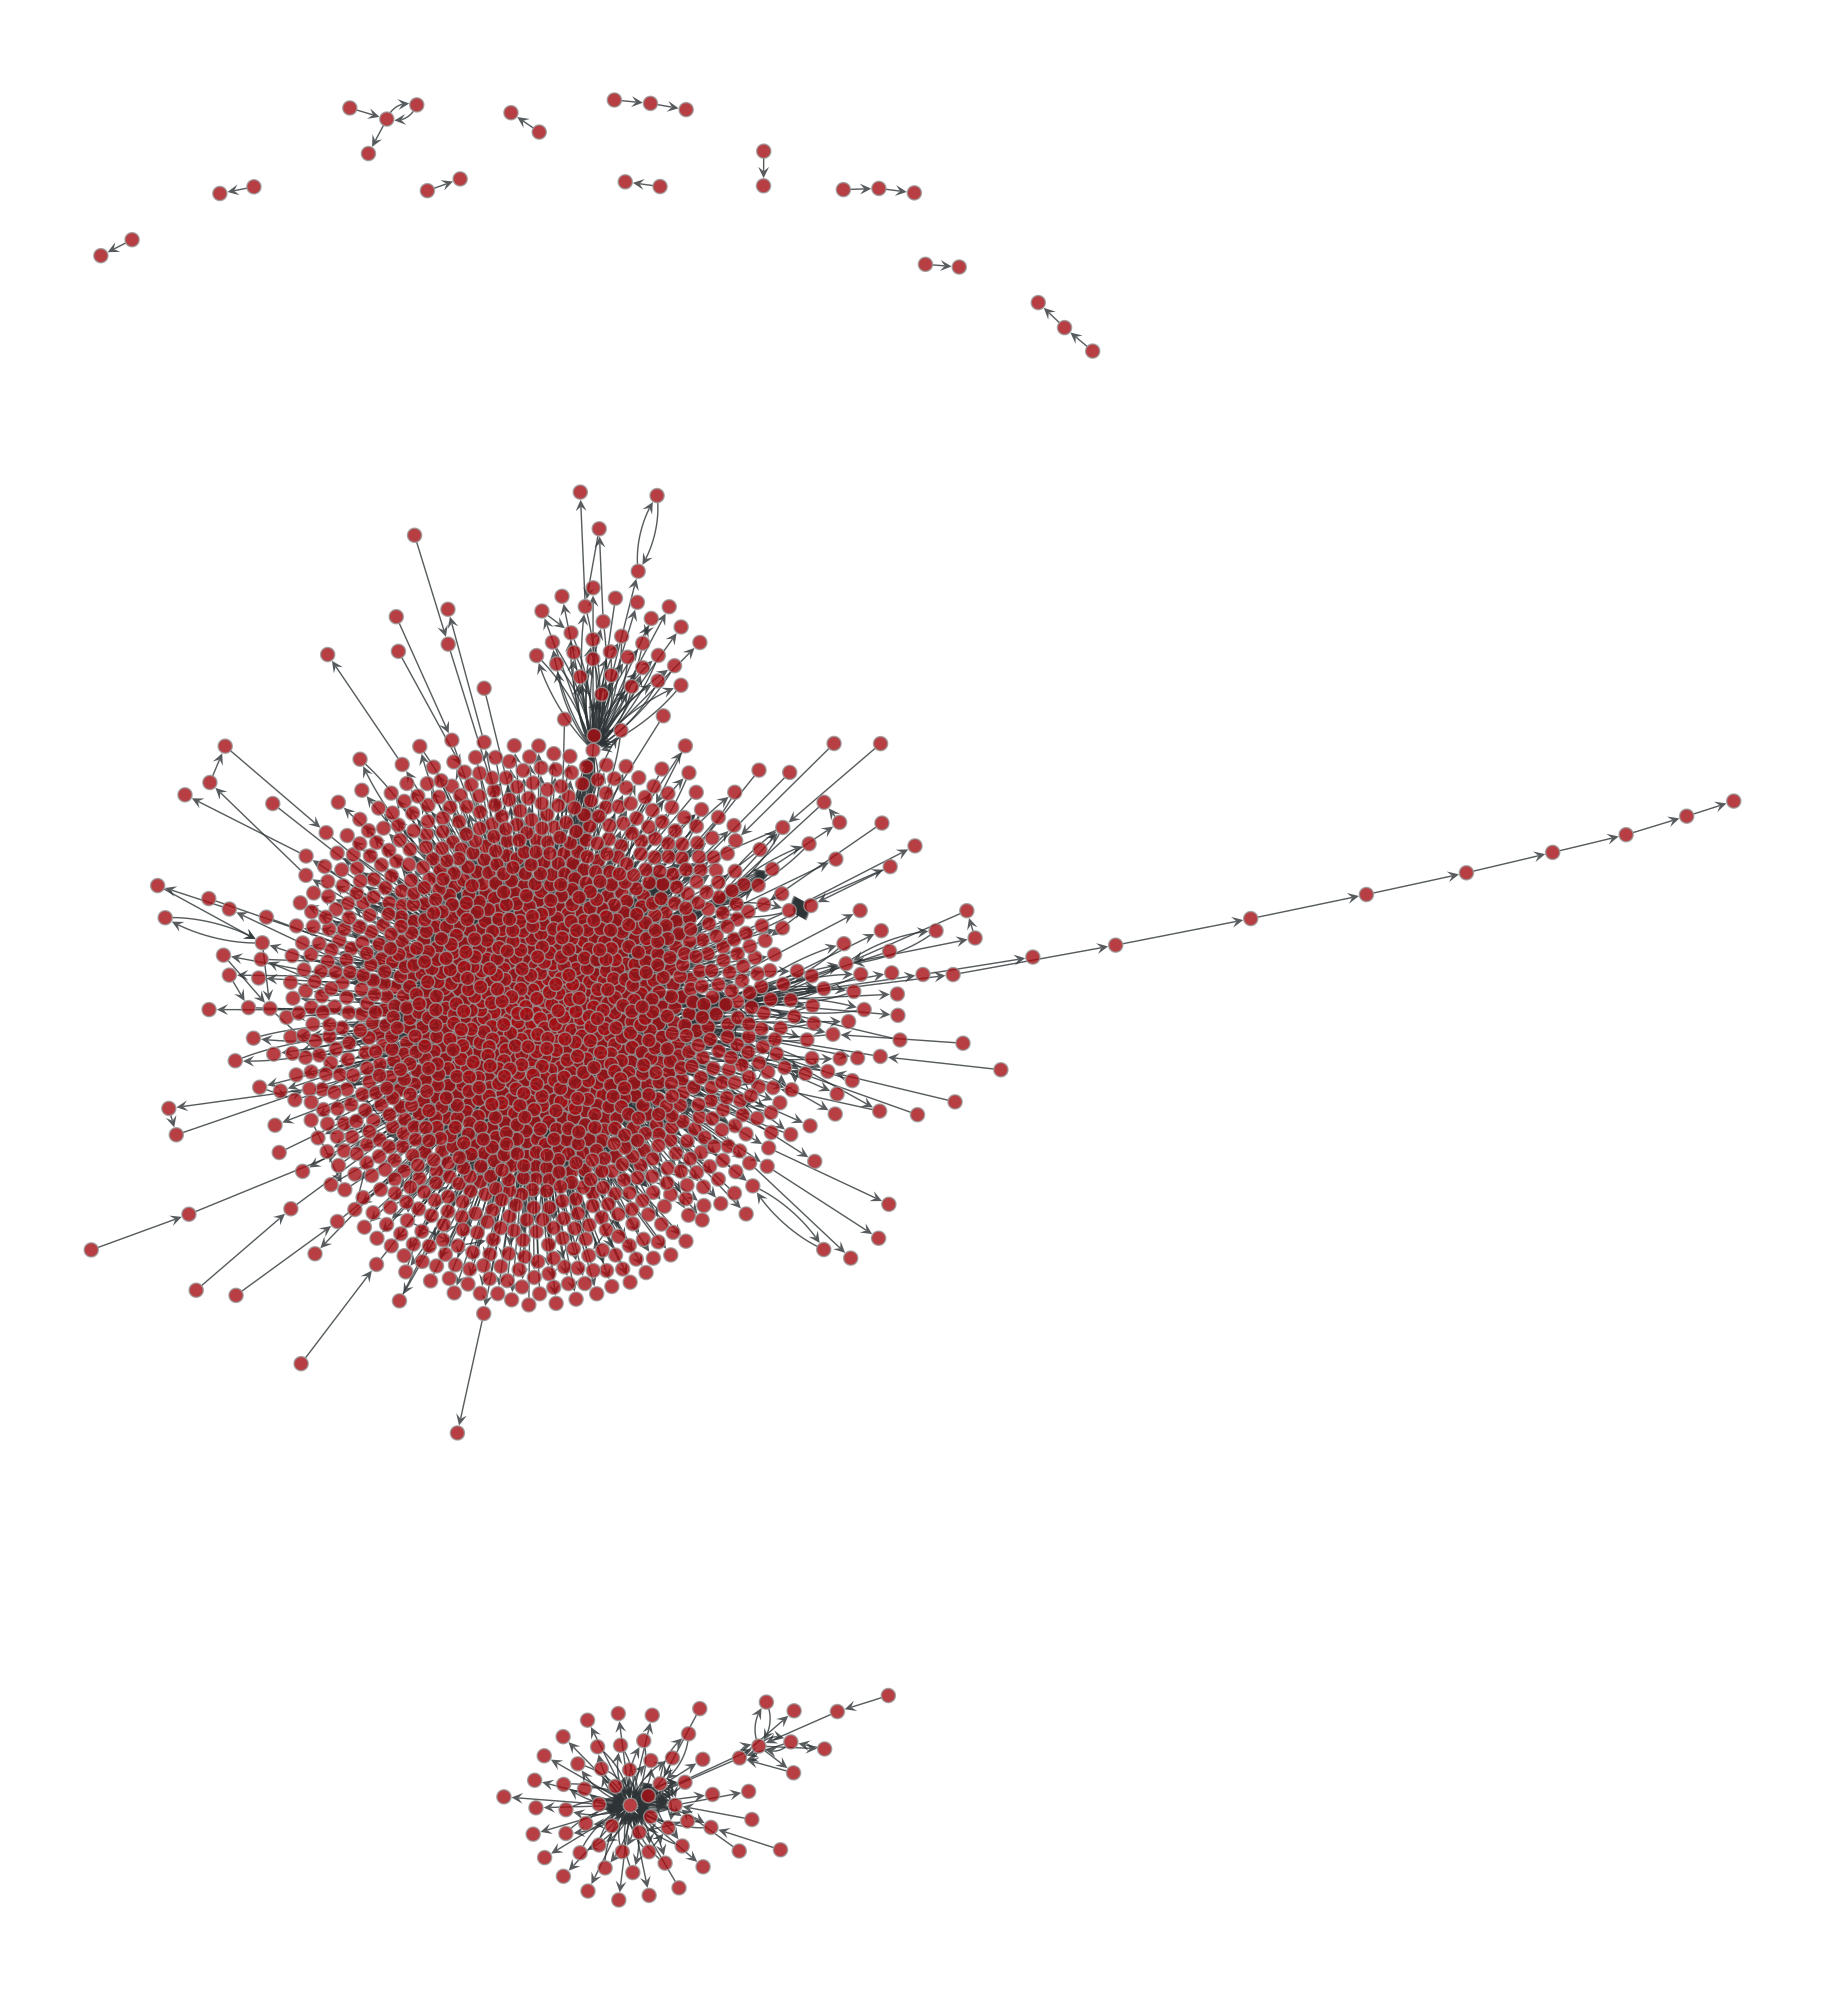

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x165ba5340, at 0x165987200>

In [49]:
gt.graph_draw(g0,output_size = (1000, 1000))

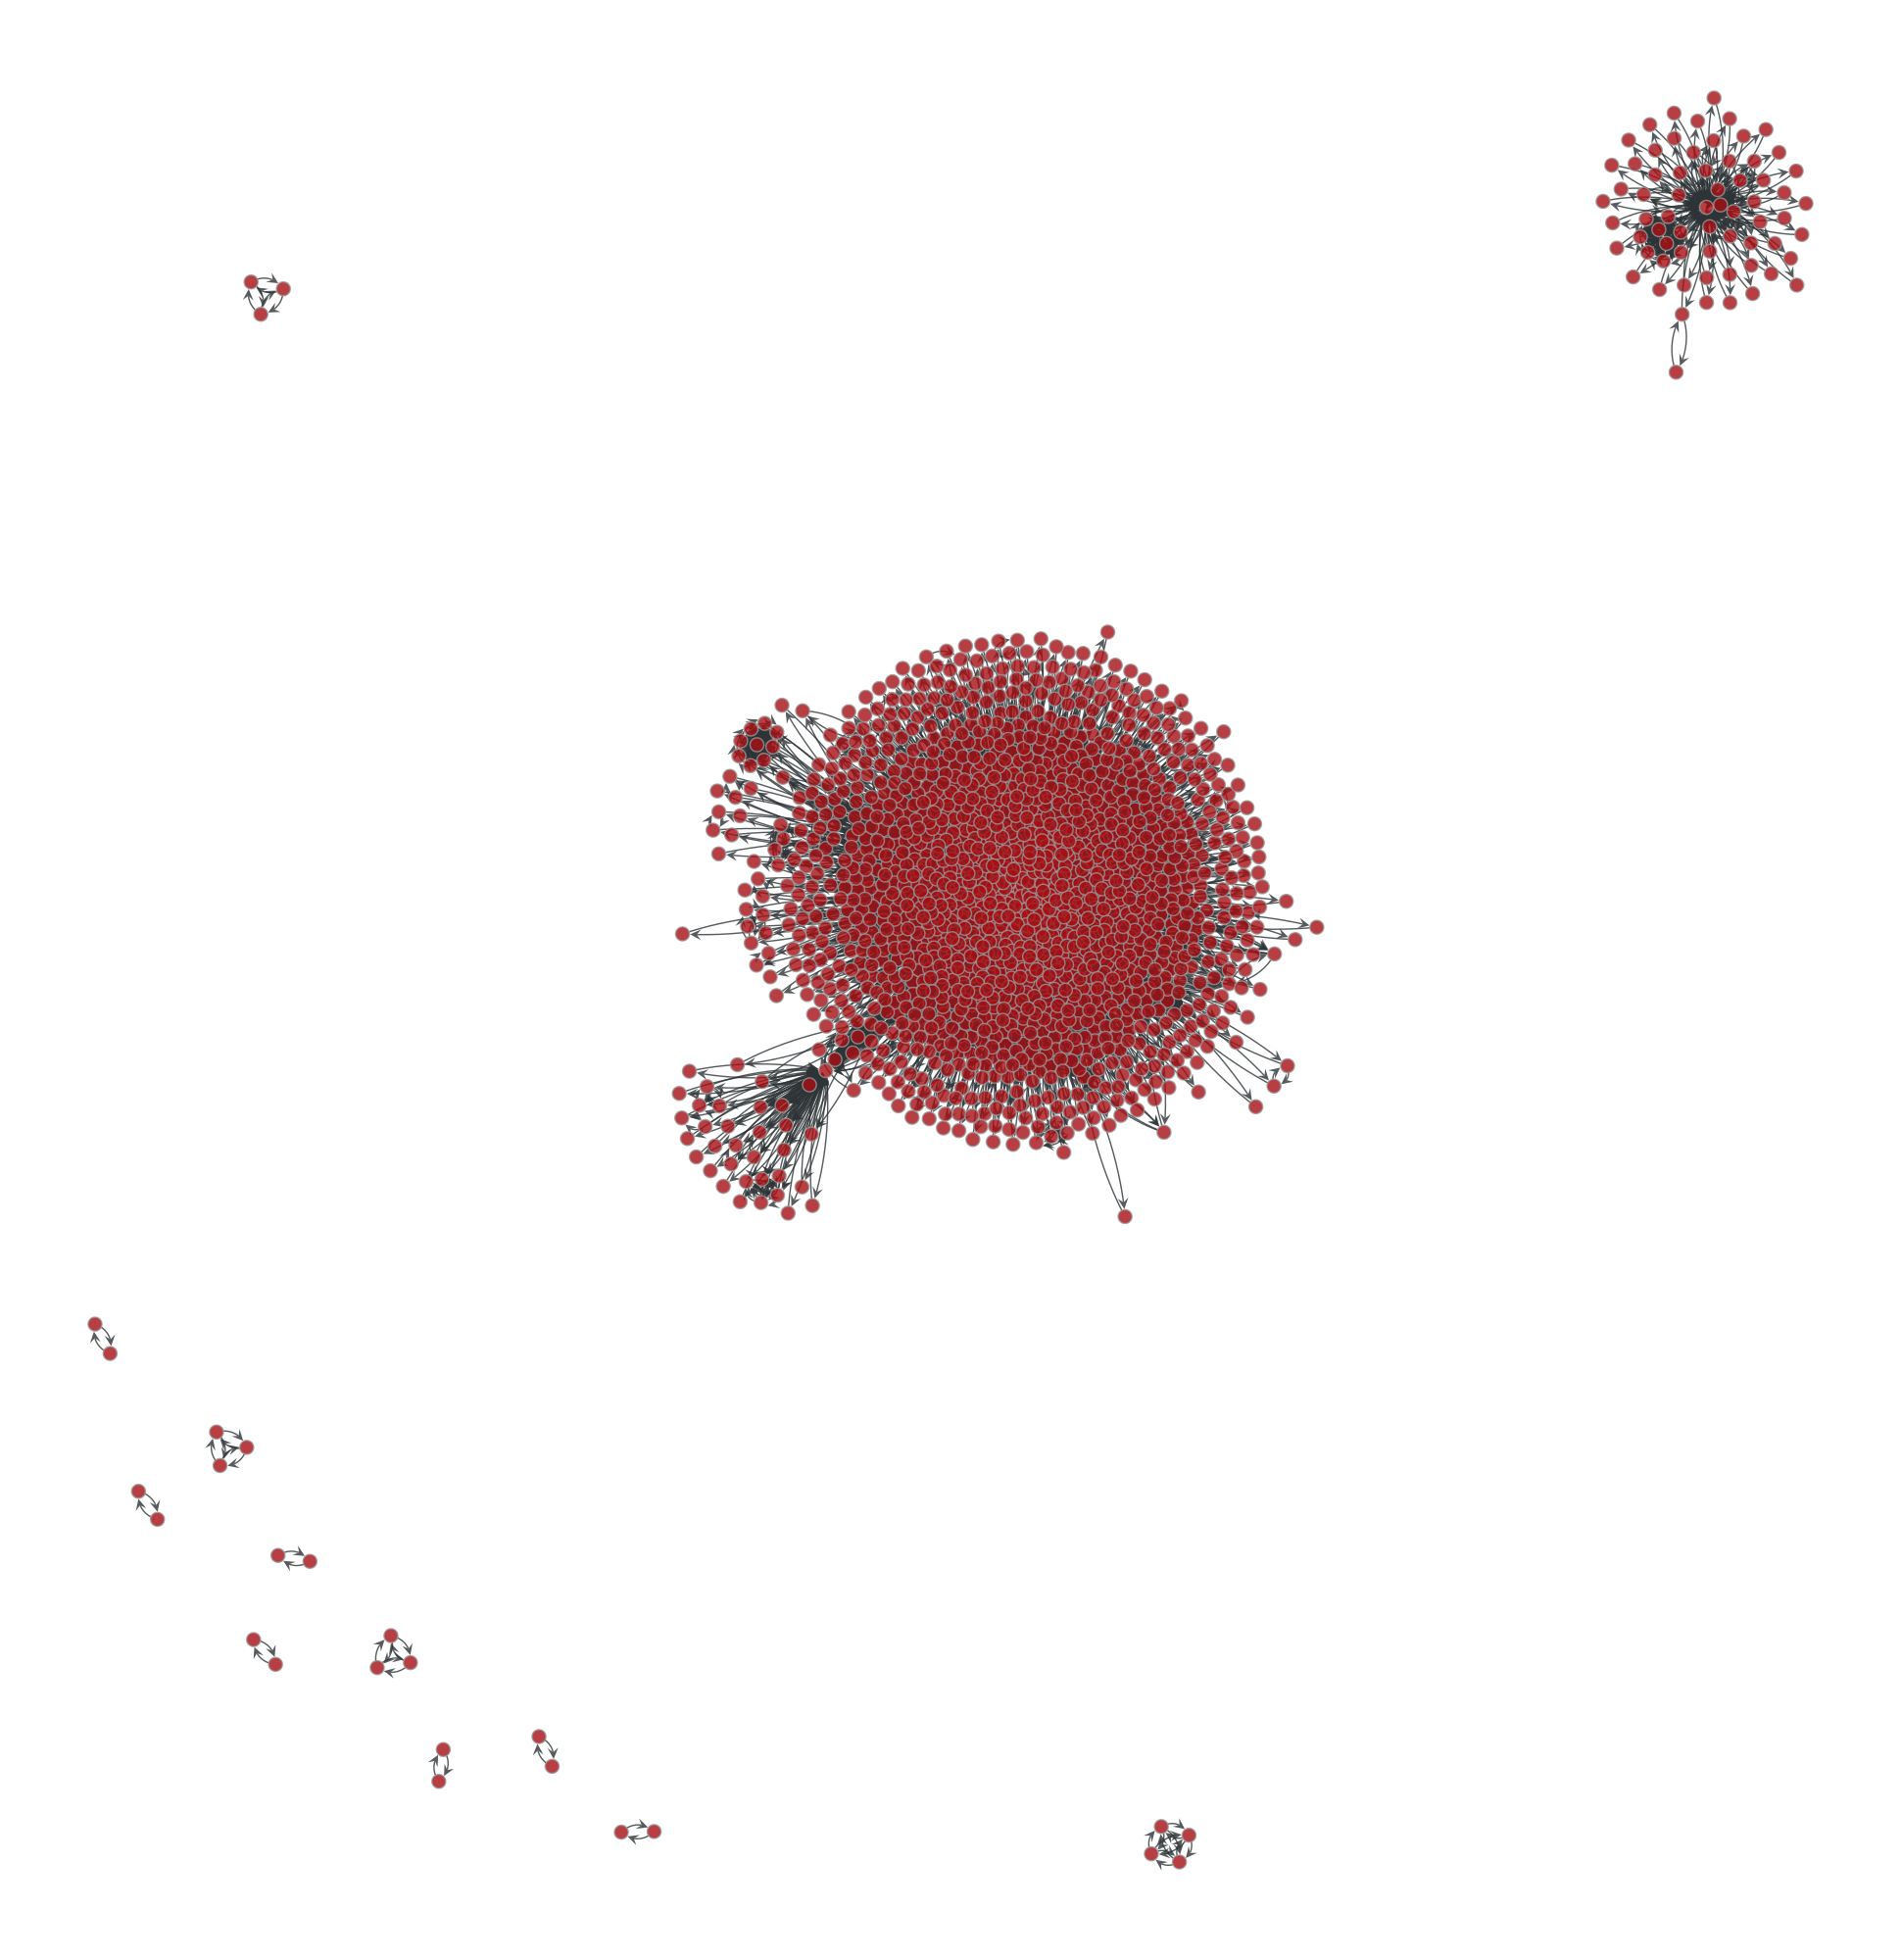

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x165a54560, at 0x127736fc0>

In [50]:
gt.graph_draw(g1,output_size = (1000, 1000))

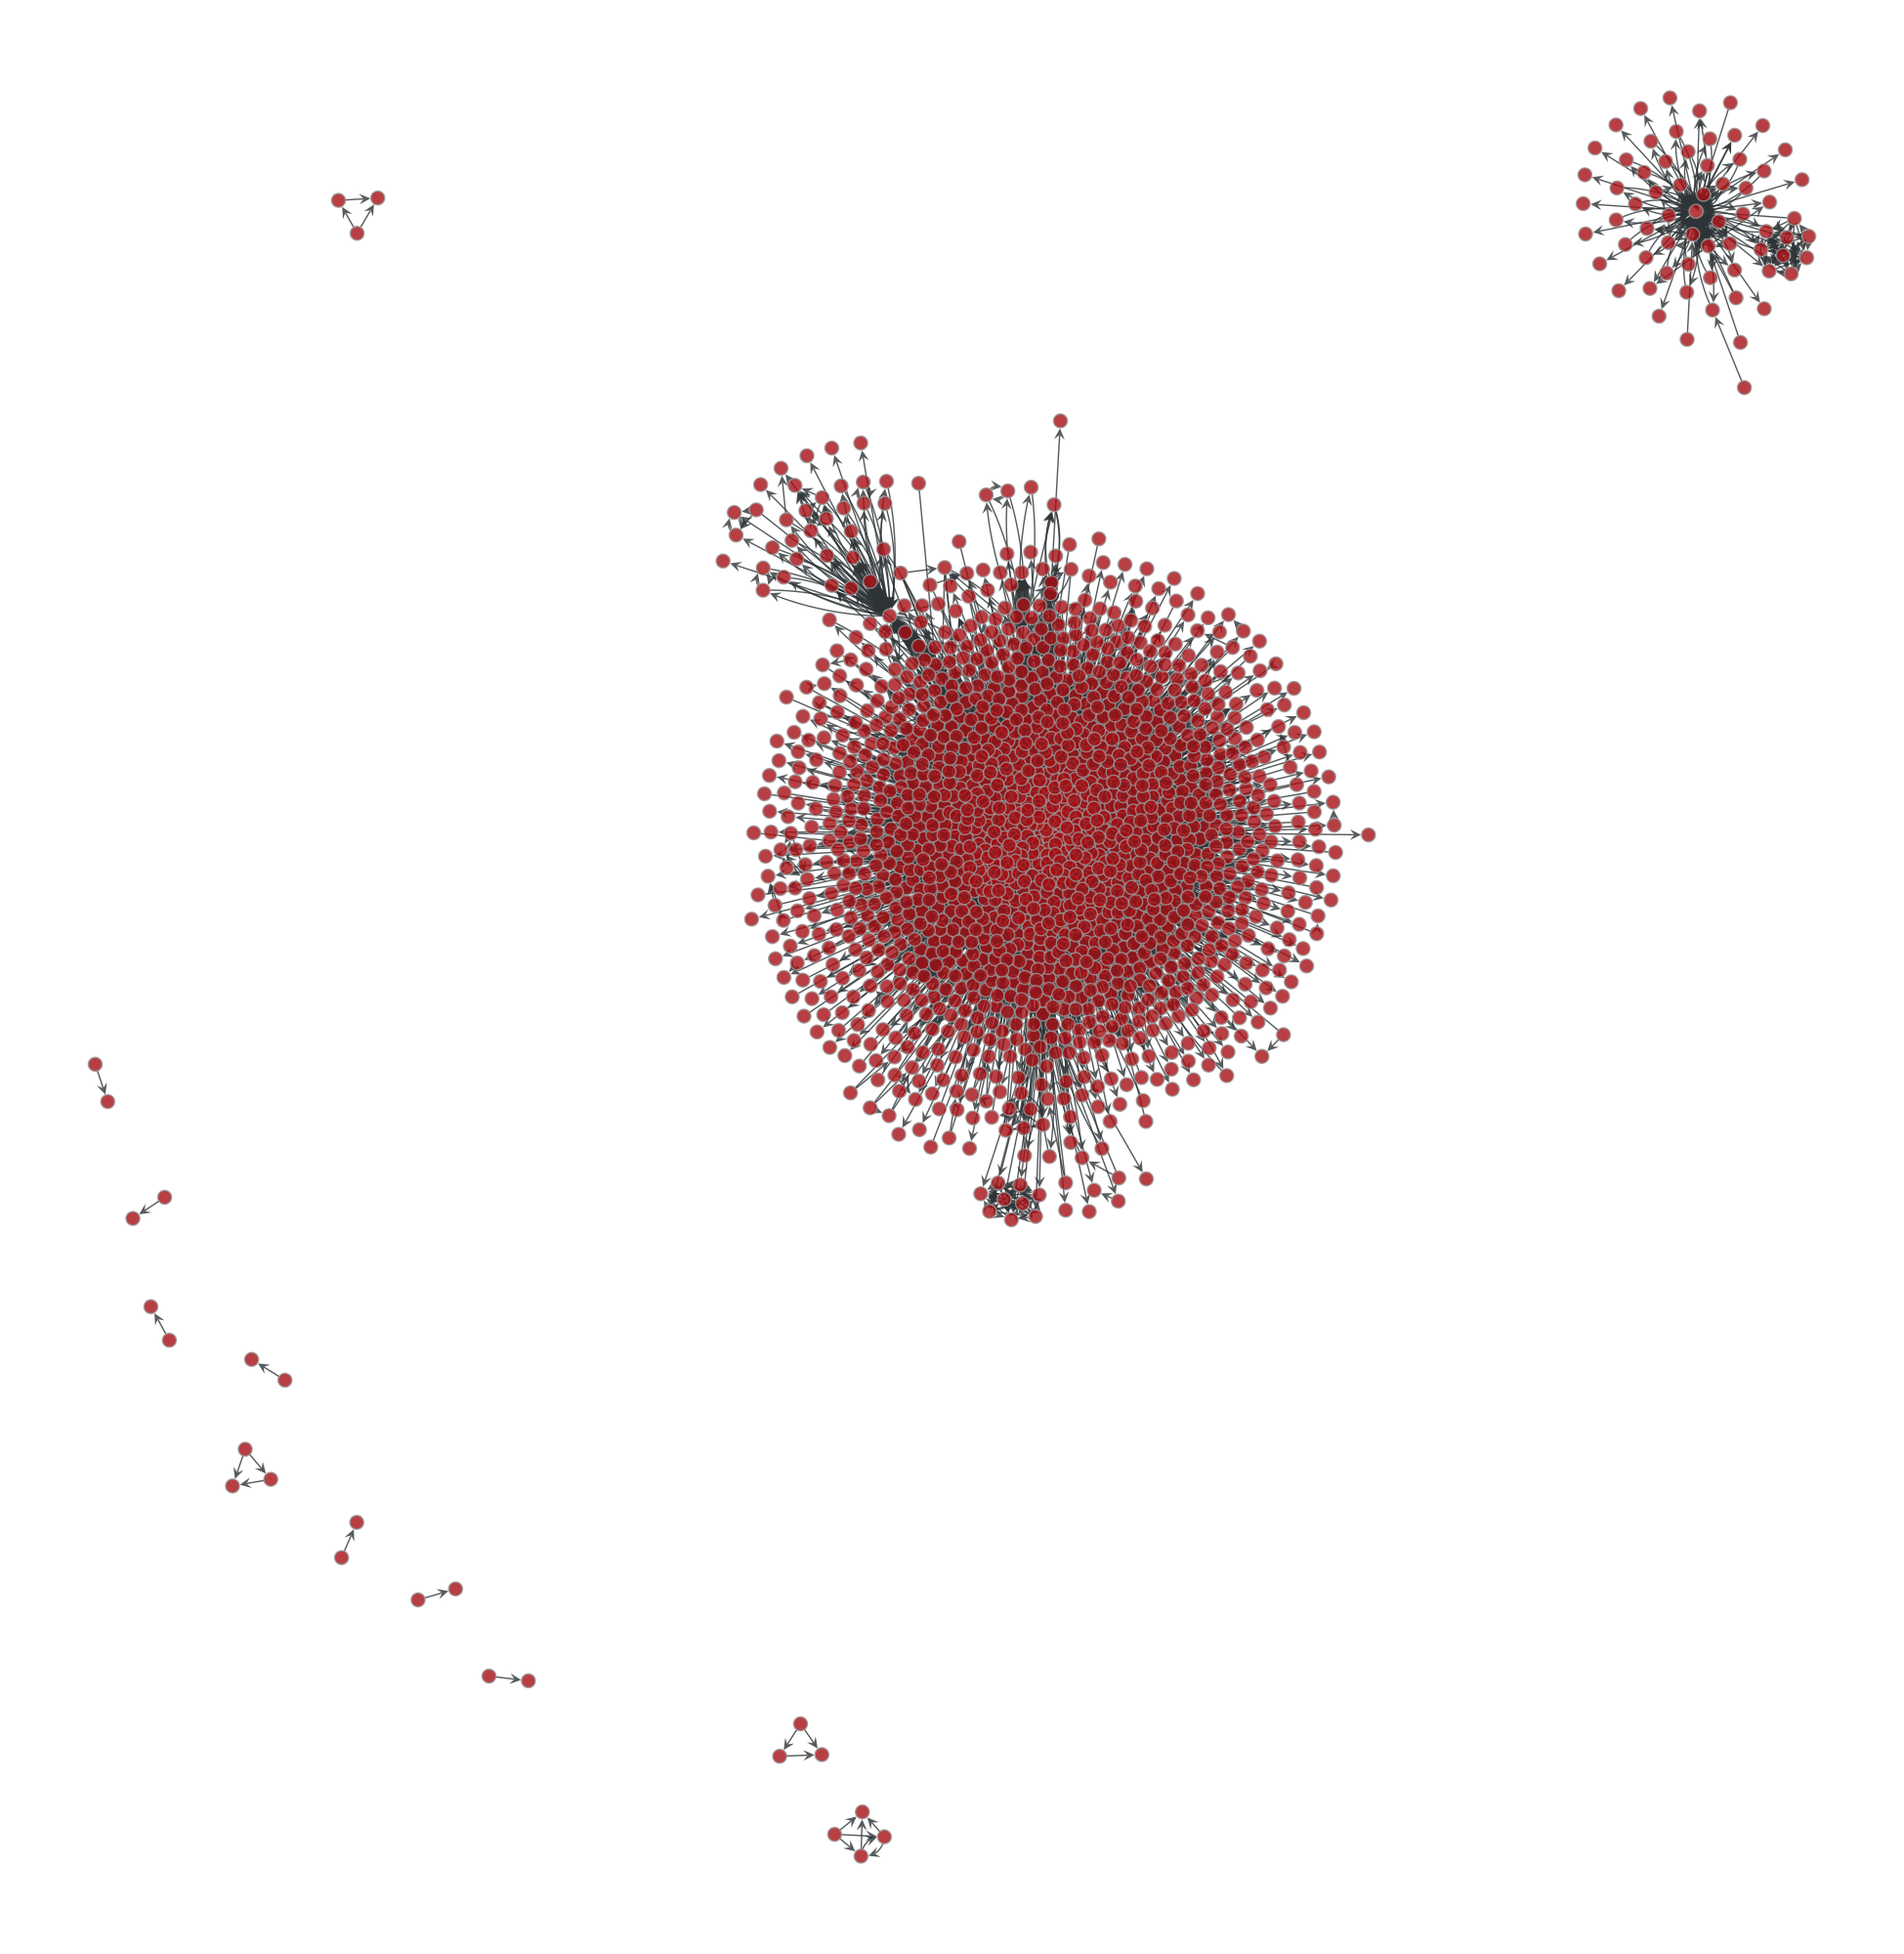

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x165bdf800, at 0x165b849e0>

In [51]:
gt.graph_draw(g2,output_size = (1000, 1000))

On y ajoute des couleurs pour y voir plus clair. On a rescale les poids sur les arcs pour y voir plus clair, on a également utilisé le layout Fruchterman Reingold. La couleur des noeuds est déterminée par les clusters trouvés (en appliquant l'algorithme de Leiden).

| Légende (14 200 arrêtes) | Graphe stratégie 1 (Naïve) |
|---------|---------|
| ![Image 1](Images/comparaison_graph_matplotlib/init/screenMatplotlibS0.png) | ![Image 2](Images/comparaison_graph_matplotlib/init/imMatplotlibS0.png) |
| (169 734 arrêtes) | Graphe stratégie 2 (hyper connecté)|
| ![Image 1](Images/comparaison_graph_matplotlib/init/screenMatplotlibS1.png) | ![Image 2](Images/comparaison_graph_matplotlib/init/imMatplotlibS1.png) |
| (87 127 arrêtes) | Graphe stratégie 3 (semi connecté)|
| ![Image 1](Images/comparaison_graph_matplotlib/init/screenMatplotlibS2.png) | ![Image 2](Images/comparaison_graph_matplotlib/init/imMatplotlibS2.png) |

On observe qu'il n'y a pas beaucoup de changement au niveau des deux derniers graphes visuellement et même au niveau de la répartition des arrêtes. Il y a cependant un peu plus de différence entre le premier graphe et les autres au niveau de la répartition des évènements (même si ce n'est pas visible sur le graphe) et également au nivau de la densité d'arrêtes présente (mais c'est une conséquence logique de la connexion forte des deux autres graphes).

Au vu des clusters trouvés, on se demande ce qu'ils pourraient signifier et s'ils sont liés à un dépot de matplotlib en particulier. [Voir la section sur les clusters](#Les-clusters)

#### Comparaison avec des métriques

Nous allons désormais comparer certaines métriques afin de voir si les différences perçues visuellement se manifestent également en terme de chiffre.

Voici les résultats obtenus en faisant run plusieurs métrics sur gephi.

| Métriques | Stratégie naïve | Stratégie hyper-connectée | Stratégie semi-connectée |
|:---------- |:---------:|:-----------:|:------------:|
| Degré moyen   | 8.728  | 104.323   | 53.551   |
| Diamètre du réseau   | 16  | 5   | 7   |
| Densité du réseau  | 0.005 | 0.064  | 0.033  |
| Composants connecté faiblement  | 13  | 13  | 13  |
| Composants connecté fortement | 582 | 13  | 582  |
| Nombre de cluster (Leiden algorithm) | 1042 | 691  | 750  |



Ces résultats ne sont pas très étonnant si on recolle les nombres à leur signification.
- Le degré moyen représente le nombre d'arrête sortant et entrant d'un noeud en moyenne (il est logique que ce nombre soit plus grand lorsque plus de noeuds sont connectés)
- Le diamètre du réseau représente la distance maximale entre toutes les paires de noeuds du réseau
- La densité du réseau représente à quel point le réseau est (car il s'agit du ratio entre le nombre d'arrête présente et le nombre maximum d'arrêtes)
- Il est logique que le graphe qui est hyperconnecté (c'est-à-dire que toutes les arrêtes dirigées le sont également dans l'autre sens) ait le même nombre de composants connectés faiblement que de composants connecté fortement. (car "l'intensité" de la connexion ne dépend du fait qu'on considère les arcs dirigés ou pas)
- Le nombre élevé de cluster lorsque les composants ne sont pas beaucoup connecté représente


Désormais on regarde des métriques propres aux noeuds

In [54]:

names = ['resultsS0', 'resultsS1', 'resultsS2']
graphs = [g0, g1, g2]
for i in range(3):
    g = graphs[i]

    closeness_scores = gt.closeness(g)
    betweenness_scores = gt.betweenness(g)

    with open(f'{names[i]}.csv', "w", newline="") as csvfile:
        writer = csv.writer(csvfile)

        writer.writerow(["ID", "Actor_name","Bot", "Closeness", "Betweenness","In_degree","Out_degree"])

        for v in g.vertices():
            vertex_id = int(v)
            attribute = g.vp["actor_name"][v]
            bot = g.vp["bot"][v]
            closeness_score = str(closeness_scores[v])
            betweenness_score = str(betweenness_scores[0][v])
            in_degree = v.in_degree()
            out_degree = v.out_degree()
            writer.writerow([vertex_id, attribute, bot, closeness_score, betweenness_score, in_degree, out_degree])

On aimerait pouvoir visualiser ces graphes avec seulement les noeuds qui sont en tête de certaines catégories afin de peut-être voir apparaître des différences entre chacune des stratégies

On va donc créer des sous-graphes

In [30]:
def createSubGraph(g : gt.Graph, data : pd.DataFrame, metric : str, nNodes : int = 10) -> gt.Graph:
    """
    Create a subgraph with the nNodes nodes that have the highest value for the metric
    """
    data = data.sort_values(by = metric, ascending = False).head(nNodes)
    vertices = []
    for i in range(nNodes):
        vertices.append(g.vertex(g.gp.vmap[data['Actor_name'].iloc[i]]))
    return gt.GraphView(g, vfilt = lambda v: v in vertices)

In [9]:
data1 = pd.read_csv('resultsS0.csv')
data2 = pd.read_csv('resultsS1.csv')
data3 = pd.read_csv('resultsS2.csv')

##### Comparaisons par rapport à la betweenness centrality

In [9]:
gT1 = createSubGraph(g0, data1, 'Betweenness')
gT2 = createSubGraph(g1, data2, 'Betweenness')
gT3 = createSubGraph(g2, data3, 'Betweenness')

gT1.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'naive_strat',  'graphMatplotlibNaiveStratbetweenness.graphml'))
gT2.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'hyper_connected_strat','graphMatplotlibHyperConnectedHyperConnectedbetweenness.graphml'))
gT3.save(os.path.join(os.getcwd(),'graph_matplotlib' , 'semi_connected_strat',  'graphMatplotlibSemiConnectedbetweenness.graphml'))

Voici les résultats pour le facteur betweenness centrality (mesure combien de fois un nœud se trouve sur le chemin le plus court entre d'autres nœuds, indiquant son rôle de "pont" dans le réseau. ). Plus le noeud est vert foncé, plus son facteur de betweenness centrality est grand.

Légende des graphes : 
![Image 4](Images/legend.png)

| Stratégie | Graphe pour les 10 contributeurs ayant le plus de betweenness centralité |
|-------|------| 
| Stratégie Naïve | ![Image 1](Images/comparaison_graph_matplotlib/betweennessC/subGraphBS0.png) | 
| Stratégie hyper-connectée |![Image 2](Images/comparaison_graph_matplotlib/betweennessC/subGraphBS1.png) |
| Stratégie semie-connectée | ![Image 3](Images/comparaison_graph_matplotlib/betweennessC/subGraphBS2.png) |

Nous pouvons comparer ces graphes car les personnes reliées sont les mêmes dans tous. On a donc que même si leur indice de betweenness varie selon la stratégie, le top 10 reste le même quelque soit la stratégie (même s'il y a des petits switch de place)

Pour essayer de comprendre pourquoi certaines flèches étaient vraiment voyantes dans certains graphes et pourquoi elles n'apparaissaient pas avec la première stratégie, on regarde dans gephi le 'data laboratory' 

Résultats observés :
- Pour le graphe hyper-connecté ![Image 1](Images/comparaison_graph_matplotlib/betweennessC/dataLabS1.png)
- Pour le graphe semi-connecté ![Image 1](Images/comparaison_graph_matplotlib/betweennessC/dataLabS2.png)
- Pour le graphe suivant la stratégie naïve ![Image 1](Images/comparaison_graph_matplotlib/betweennessC/dataLabS0.png)

Comme les poids représentent le nombre de fois qu'un contributeur à "répondu à quelqu'un" dans le dépot et que on définit différemment le fait de répondre à quelqu'un d'une stratégie à une autre, il est logique d'observer de grosses différences.
En effet,
- Dans la première stratégie, "A répond à B" ssi A collabore juste après B (donc A est le successur de B) sur un même évènement, il est donc plus difficile d'avoir des poids importants.
- Dans la deuxième stratégie (hyper-connectée), "A répond à B" ssi A et B ont un jour travaillé sur le même évènement. Les arrêtes pourraient donc être non-dirigées puisque dès que l'on a un sens, on a l'autre. De plus, si une personne collabore plusieurs fois sur un même évènement, comme on relie chaque personne avec les autres (déjà présentes) et qu'on incrémente le poids d'une arrête si l'arrête se trouve déjà dans le graphe. Alors, plus quelqu'un contribue plus l'arrête le reliant aux autres augmente en poids. Donc si deux personnes contribuent beaucoup sur un même évènement c'est surtout le poids de l'arrête entre ces deux contributeurs qui se détache des autres.
- Dans la dernière stratégie (semie-connectée), "A répond à B" ssi A a collaboré après B. On garde donc ici une certaine notion de temporalité même si le dernier contributeur sera d'office relié à tous les autres. Le poids élevé d'une arrête allant de A vers B peut signifier deux choses :
    - Soit le contributeur B a contribué beaucoup avant A
    - Soit le contributeur A a contribué beaucoup après un contributeur B.

    S'il y a d'autres contributeurs, il est simple de détecter dans quel cas nous sommes puisque dans le premier cas, tous les contributeurs C qui sont après A auront le même poids sur l'arrête allant de C à B. Et si c'est le deuxième cas, alors tous les contributeurs C qui ont contribué avant B, auront le même poids sur l'arrête allant de A à C.

Ainsi, on remarque que la deuxième et troisième stratégies sont assez complémentaires. En effet, la deuxième permet de repérer les contributeurs ayant le plus contribué sur un évènement et la troisième stratégie permet d'identifier celui ayant le plus contribué.

##### Comparaison par rapport à la closeness centrality 

On va faire la même analyse pour la closeness centrality qui évalue à quel point un noeud est proche de tous les autres

In [8]:
gT0 = createSubGraph(g0, data1, 'Closeness')
gT1 = createSubGraph(g1, data2, 'Closeness')
gT2 = createSubGraph(g2, data3, 'Closeness')

gT0.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'naive_strat',  'graphMatplotlibNaiveStratSubCloseness.graphml'))
gT1.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'hyper_connected_strat', 'graphMatplotlibHyperConnectedSubCloseness.graphml'))
gT2.save(os.path.join(os.getcwd(),'graph_matplotlib' , 'semi_connected_strat',  'graphMatplotlibSemiConnectedSubCloseness.graphml'))

Légende des graphes : 
![Image 4](Images/legend.png)

| Stratégie | Graphe pour les 10 contributeurs ayant le plus de closeness centralité |
|-------|------| 
| Stratégie Naïve | ![Image 1](Images/comparaison_graph_matplotlib/closeness/subGraphClosenessS0.png) | 
| Stratégie hyper-connectée |![Image 2](Images/comparaison_graph_matplotlib/closeness/subGraphClosenessS1.png) |
| Stratégie semie-connectée | ![Image 3](Images/comparaison_graph_matplotlib/closeness/subGraphClosenessS2.png) |

On remarque que les noms ne sont pas tous identiques, donc la stratégie influence le top 10 pour la métrique : closness centrality

Comme ces résultats sont un peu étonnant nous allons visualiser les 10 première lignes des 3 bases de données différentes

In [16]:
data1.sort_values(by = "Closeness", ascending= False).head(10)

ID    Actor_name  Bot  Closeness   Betweenness  In_degree  Out_degree
1389  1389       Ed-Yang    0        1.0  0.000000e+00          0           1
528    528     hunghaoti    0        1.0  3.784653e-07          1           1
1539  1539       GauriTr    0        1.0  0.000000e+00          1           1
1538  1538  adriandelser    0        1.0  4.238812e-04          2           1
1074  1074   petrovfedor    0        1.0  4.238812e-04          1           1
1090  1090     OceanWolf    0        1.0  4.238812e-04          1           1
547    547      sammlapp    0        1.0  4.265304e-04          1           1
1097  1097       manuh-L    0        1.0  0.000000e+00          0           1
954    954  andrzejnovak    0        1.0  4.238812e-04          1           1
472    472     Gairick52    0        1.0  4.238812e-04          5           1

In [17]:
data2.sort_values(by = "Closeness", ascending= False).head(10)

ID        Actor_name  Bot  Closeness  Betweenness  In_degree  \
826    826    VladimirIvonin    0        1.0          0.0          1   
1363  1363     ayushmaan1010    0        1.0          0.0          2   
1594  1594         annemoree    0        1.0          0.0          1   
1388  1388  KingOfHearts7865    0        1.0          0.0          1   
1389  1389           Ed-Yang    0        1.0          0.0          1   
654    654      Europium-152    0        1.0          0.0          1   
1276  1276      nchristensen    0        1.0          0.0          2   
1275  1275      dflvunoooooo    0        1.0          0.0          2   
655    655          malfatti    0        1.0          0.0          1   
1274  1274        tobiasBora    0        1.0          0.0          2   

      Out_degree  
826            1  
1363           2  
1594           1  
1388           1  
1389           1  
654            1  
1276           2  
1275           2  
655            1  
1274           2

In [18]:
data3.sort_values(by = "Closeness", ascending= False).head(10)

ID        Actor_name  Bot  Closeness  Betweenness  In_degree  \
1539  1539           GauriTr    0        1.0          0.0          3   
1276  1276      nchristensen    0        1.0          0.0          0   
1097  1097           manuh-L    0        1.0          0.0          0   
549    549           Keeks77    0        1.0          0.0          6   
1090  1090         OceanWolf    0        1.0          0.0          1   
1265  1265      jaweriaamjad    0        1.0          0.0          4   
1538  1538      adriandelser    0        1.0          0.0          3   
1074  1074       petrovfedor    0        1.0          0.0          3   
548    548     mChoakumchild    0        1.0          0.0          7   
770    770  ReubenVandezande    0        1.0          0.0          1   

      Out_degree  
1539           1  
1276           2  
1097           1  
549            3  
1090           1  
1265           1  
1538           1  
1074           1  
548            2  
770            1

On remarque que tous ces noeuds ont une closeness centrality égale à 1 (le plus grand nombre possible car c'est normalisé). Et donc, il est logique d'avoir eu des personnes différentes dans le top 10. On va donc essayer de trouver un 'bon' nombre de personne à afficher afin de pouvoir comparer mieux

Pour cela, on regarde le nombre total de noeud ayant une closeness centrality égale à 1


In [24]:
data1['Closeness'][data1.Closeness == 1].value_counts(sort = True, ascending= False) 

Closeness
1.0    27
Name: count, dtype: int64

In [27]:
data2['Closeness'][data2.Closeness == 1].value_counts(sort = True, ascending= False) 

Closeness
1.0    27
Name: count, dtype: int64

In [28]:
data3['Closeness'][data3.Closeness == 1].value_counts(sort = True, ascending= False) 

Closeness
1.0    39
Name: count, dtype: int64

On va refaire des graphes en prenant les 45 premiers

In [31]:
gT1 = createSubGraph(g0, data1, 'Closeness', 45)
gT2 = createSubGraph(g1, data2, 'Closeness', 45)
gT3 = createSubGraph(g2, data3, 'Closeness', 45)

gT1.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'naive_strat',  'graphMatplotlibNaiveStratSubCloseness45.graphml'))
gT2.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'hyper_connected_strat', 'graphMatplotlibHyperConnectedSubCloseness45.graphml'))
gT3.save(os.path.join(os.getcwd(),'graph_matplotlib' , 'semi_connected_strat',  'graphMatplotlibSemiConnectedSubCloseness45.graphml'))

Légende des graphes : 
![Image 4](Images/legend.png)

| Stratégie | Graphe pour les 45 contributeurs ayant le plus de closeness centralité |
|-------|------| 
| Stratégie Naïve | ![Image 1](Images/comparaison_graph_matplotlib/closeness/subGraphCloseness45S0.png) | 
| Stratégie hyper-connectée |![Image 2](Images/comparaison_graph_matplotlib/closeness/subGraphCloseness45S1.png) |
| Stratégie semie-connectée | ![Image 3](Images/comparaison_graph_matplotlib/closeness/subGraphCloseness45S2.png) |

On remarque pour tous les graphes que même si certains noeuds ont une closeness centralité maximale, ils ne sont parfois pas connecté du tout (ou juste connecté à un autre noeud). 

Sinon, on ne peut pas conclure grand chose de cette approche

##### Comparaison par rapport aux degrés entrant et sortant

On va finir par analyse les différences que l'on voit pour les in et out degrees 

In [33]:
gT0 = createSubGraph(g0, data1, 'In_degree', 10)
gT1 = createSubGraph(g1, data2, 'In_degree', 10)
gT2 = createSubGraph(g2, data3, 'In_degree', 10)

gT0.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'naive_strat',  'graphMatplotlibNaiveStratSubInDegree.graphml'))
gT1.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'hyper_connected_strat', 'graphMatplotlibHyperConnectedSubInDegree.graphml'))
gT2.save(os.path.join(os.getcwd(),'graph_matplotlib' , 'semi_connected_strat',  'graphMatplotlibSemiConnectedSubInDegree.graphml'))

In [34]:
gT01 = createSubGraph(g0, data1, 'Out_degree', 10)
gT11 = createSubGraph(g1, data2, 'Out_degree', 10)
gT21 = createSubGraph(g2, data3, 'Out_degree', 10)

gT01.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'naive_strat',  'graphMatplotlibNaiveStratSubOutDegree.graphml'))
gT11.save(os.path.join(os.getcwd(), 'graph_matplotlib', 'hyper_connected_strat', 'graphMatplotlibHyperConnectedSubOutDegree.graphml'))
gT21.save(os.path.join(os.getcwd(),'graph_matplotlib' , 'semi_connected_strat',  'graphMatplotlibSemiConnectedSubOutDegree.graphml'))

Légende des graphes : 
![Image 4](Images/legend.png)

|Num strat| Graphe pour les 10 contributeurs ayant le plus de in-degré | Graphe pour les 10 contributeurs ayant le plus de out-degré |
|-------|------|------|
| 1 | ![Image 4](Images/comparaison_graph_matplotlib/in_out/subGraphInS0.png) | ![Image 1](Images/comparaison_graph_matplotlib/in_out/subGraphOutS0.png) | 
| détail | ![Image 8](Images/comparaison_graph_matplotlib/in_out/dataInS0.png) | ![Image 9](Images/comparaison_graph_matplotlib/in_out/dataoutS0.png) | 
| 2 | ![Image 5](Images/comparaison_graph_matplotlib/in_out/subGraphInS1.png) |![Image 2](Images/comparaison_graph_matplotlib/in_out/subGraphOutS1.png) |
| détail | ![Image 10](Images/comparaison_graph_matplotlib/in_out/dataInS1.png) | ![Image 11](Images/comparaison_graph_matplotlib/in_out/dataoutS1.png) | 
| 3 | ![Image 6](Images/comparaison_graph_matplotlib/in_out/subGraphInS2.png) | ![Image 3](Images/comparaison_graph_matplotlib/in_out/subGraphOutS2.png) |
| détail | ![Image 12](Images/comparaison_graph_matplotlib/in_out/dataInS2.png) | ![Image 13](Images/comparaison_graph_matplotlib/in_out/dataoutS2.png) | 

On remarque sans surprise que les degré sont bien plus grand pour la deuxième et troisième stratégie. Cependant même si le top 10 change un peu, les acteurs principaux restent en général les mêmes

Donc la stratégie influence le degré mais c'est proportionnel (c'est-à-dire que les contributeurs qui avaient un degré élevé l'ont encore même si le degré à augmenté)

##### Conclusion

Finalement, la différence entre les différentes stratégies est peu visible au niveau visuel. Au niveau des métriques, les différences sont également assez minimes. Les contributeurs ayant des métriques élevées sont souvent les mêmes pour toutes les stratégies.
Cependant, la différence entre ces stratégies est surtout visible au niveau des poids sur les arrêtes et ce qu'ils signifient.  

### Analyse plus poussée du graphe

#### Les clusters

##### Sur le graphe de matplotlib

Comme les clusters sur le graphe fait en utilisant la stratégie hyper-connectée semble plus visible, on utilisera ce graphe là pour analyser les différents clusters.


| Légendes | Graphe |
|-----|------|
| ![Images](Images/cluster/legendCluster.png) ![Images](Images/cluster/legendRepo.png)| ![Images](Images/cluster/graph.png)|

En observant mieux le graphe, on a l'impression que les clusters s'apparentent à des dépots. Mais on aimerait vérifier cette hypothèse. Pour cela, on va filtrer sur les clusters d'un coté et sur les dépots de l'autre afin de voir à quel point ce que l'on obtient est similaire

| N° de cluster et dépot| Cluster | Dépot | 
|-------|-------|--------|
| -  Cluster 0 <br> - matplotlib/matplotlib|![Image](Images/cluster/cluster0.png)| ![Image](Images/cluster/repomatplotlib.png) |
| -  Cluster 1 <br> - matplotlib/mplfinance|![Image](Images/cluster/cluster1.png)|  ![Image](Images/cluster/repoMPLFinance.png) |
| - Cluster 2 <br> - matplotlib/basemap | ![Image](Images/cluster/cluster2.png)| ![Image](Images/cluster/repobasemap.png) |
| - Cluster 4 <br> - matplotlib/ipympl | ![Image](Images/cluster/cluster4.png)| ![Image](Images/cluster/repoipympl.png) |

On remarque que les clusters sont remarqués efficacement lorsqu'on a une composante fortement connexe (un peu comme pour le cluster 1) ou des contributeurs ne contribuant souvent qu'à un seul dépot (un peu comme pour le cluster 2). Mais lorsqu'on a une composante fortement connexe qui ne représente pas l'entièreté des interactions dans le dépot, alors, il l'algorithme de clustering ne détecte pas les autres contributeurs comme faisant parti du dépot. Il faut tout de même vérifier si ce n'est pas en partie parce que ces autres contributeurs participent à d'autres dépots

On vérifie cela :
| Légende | Graphe | 
|---------|---------|
| ![Image](Images/cluster/legendAnalyse.png)| ![Image](Images/cluster/repoipymplAnalyse.png) |
| ![Image](Images/cluster/legendSansRepoAnalyse.png)| ![Image](Images/cluster/sansRepoipymplAnalyse.png) |

Au vu des résultats, on se dit que les id_event pourraient aussi influencer les clusters


| Légende | Graphe | 
|---------|---------|
| ![Image](Images/cluster/legendAnalyseEvent.png)| ![Image](Images/cluster/analyseEventLabel.png) |


On voit sur gephi qu'il y a 1277 évènements différents et que ces évènements et que même si on remarque que certains évènements ont plus d'arrêtes (grâce au poucentage). Ils ne se démarquent pas sur le graphe. On peut donc se dire que ces contributeurs sont reliés par plusieurs évènements différents.

On remarque cependant que le cluster 4 ne contient que des personnes ayant participé à un seul et unique évènement.

##### Sur le graphe entier

On aimerait voir quels sont les clusters repérés par l'algorithme si on le fait tourner sur le graphe entier

Voici le graphe entier : 
| Légende | Graphe|
|-------|--------|
| ![Image](Images/cluster/legendClusterAllGraph.png) | ![Image](Images/cluster/clusterAllGraph.png)

On analyse les clusters

| Légende | Graphe | Graphe avec layout refait|
|-------|-----|------|
| Pour le cluster 0 ![Image](Images/cluster/legendCluster0AllGraph.png)| ![Image](Images/cluster/cluster0AllGraphOrigin.png) | ![Image](Images/cluster/cluster0AllGraphCol.png) |
| Pour le cluster 1 ![Image](Images/cluster/legendCluster1AllGraph.png)| ![Image](Images/cluster/cluster1AllGraphOrigin.png) | ![Image](Images/cluster/cluster1AllGraph.png) |
| Pour le cluster 2 ![Image](Images/cluster/legendCluster2AllGraph.png)| ![Image](Images/cluster/cluster2AllGraphOrigin.png) | ![Image](Images/cluster/cluster2AllGraph.png) |


On remarque que ces clusters permettent de montrer les différentes collaborations entre plusieurs organisations.

J'ai également trouvé dans les graphes des clusters où les arrêtes représentait presque entièrement qu'une seule organisation

| Cluster et organisation | Graphe cluster | Graphe Organisation |
|-----------|----------|---------|
| -Cluster 3 <br> -sympy | ![Image](Images/cluster/cluster3AllGraphSympyOrigin.png)| ![Image](Images/cluster/allGraphSympy.png) |
| -Cluster 5 <br> - OSGeo | ![Image](Images/cluster/cluster5AllGraphOSgeo.png)| ![Image](Images/cluster/allGraphOSGeo.png) |
| -Cluster 19 <br> - OSGeo | ![Image](Images/cluster/cluster19AllGraphOSgeo.png)| ![Image](Images/cluster/allGraphOSGeo.png) |
| -Cluster 6 <br> - GalaxyProject | ![Image](Images/cluster/cluster6AllGraphGalaxyP.png)| ![Image](Images/cluster/allGraphGalaxyP.png) |
| -Cluster 7 <br> - spyder-ide | ![Image](Images/cluster/cluster7AllGraphspyder-ide.png)| ![Image](Images/cluster/allGraphspyder-ide.png) |
| -Cluster 22 <br> - spyder-ide | ![Image](Images/cluster/cluster22AllGraphspyder-ide.png)| ![Image](Images/cluster/allGraphspyder-ide.png) |
| -Cluster 9 <br> - Conda | ![Image](Images/cluster/cluster9AllGraphConda.png)| ![Image](Images/cluster/allGraphConda.png) |
| -Cluster 34 <br> - matplotlib | ![Image](Images/cluster/cluster34AllGraphmatplotlib.png)| ![Image](Images/cluster/allGraphmatplotlib.png) |

Comme on peut le voir les clusters n'englobe pas une organisation en entier mais sont souvent inclu à une organisation. On remarque également qu'il peut y avoir plusieurs cluster dans une seule organisation. Et lorsque ce n'est pas le cas, les clusters représentent alors les membres les plus actifs (ceux ayant collaboré dans beaucoup d'évènement)

### Réduire la taille du graphe

Pour rendre le graphe plus facile à analyser, on aimerait réduire sa taille tout en gardant ses propriétés.

Pour avoir une petite idée du nombre de contributeurs qu'on obtiendra selon le filtre, on filtre le graphe entier sur gephi et on regarde le pourcentage de noeuds/arrêtes restantes

Il faudra prendre en compte le fait qu'on ne sait pas retirer les noeuds qui ne sont plus connecté après avoir filtré le graphe. Donc les résultats sont un peu biaisés

De plus, on filtre le graph seulement sur les noeuds et arrêtes qui le constitue c'est à dire qu'un contributeur est dans le graphe s'il a collaboré sur des issues, reviews ou pull requests

Voici la légende pour la couleur des points : ![Image 7](Images/comparaison_réduction_graph/legendeNoeud.png)

| Filtre | Pourcentage noeuds et d'arrêtes | Aperçu du graphe | Légende | 
|--------|--------|---------|-----------|
| Aucun | Noeuds : <br>  100% (24829/24829) <br> <br> Arrêtes : <br>  100% (367094/367094)  | ![image.png](Images/comparaison_réduction_graph/tout.png) | ![image.png](Images/comparaison_réduction_graph/legendTout.png)| 
| A collaboré dans au moins 2 dépots | Noeuds : <br>  19% (4752/24829) <br> <br> Arrêtes : <br>  79.66% (292431/367094)  | ![image.png](Images/comparaison_réduction_graph/repoTest.png) | ![image.png](Images/comparaison_réduction_graph/legendRepo.png)| 
| A collaboré dans au moins 2 organisations |  Noeuds : <br> 11.95% (2967/24829)  <br> <br> Arrêtes : <br> 53.38% (195967/367094)  | ![image.png](Images/comparaison_réduction_graph/orgaTest.png) | ![image.png](Images/comparaison_réduction_graph/legendOrga.png)|
| A collaboré sur au moins 2 évènements différents |  Noeuds : <br> 39.49% (9805/24829)  <br> <br> Arrêtes : <br>  93.44% (343010/367094) | ![image.png](Images/comparaison_réduction_graph/event.png) | ![image.png](Images/comparaison_réduction_graph/legendEvent.png)|
| Est un humain |  Noeuds : <br> 51.76% (12852/24829)  <br> <br> Arrêtes : <br>  77.42% (284221/367094) | ![image.png](Images/comparaison_réduction_graph/human.png) | ![image.png](Images/comparaison_réduction_graph/legendHuman.png)|
| Est indéterminé |  Noeuds : <br> 42.46% (10542/24829)  <br> <br> Arrêtes : <br>  0.61% (2235/367094) | ![image.png](Images/comparaison_réduction_graph/unknown.png) | ![image.png](Images/comparaison_réduction_graph/legendUnknown.png)|
| Est un bot |  Noeuds : <br> 3.77% (936/24829)  <br> <br> Arrêtes : <br>  0.6% (2217/367094) | ![image.png](Images/comparaison_réduction_graph/bot.png) | ![image.png](Images/comparaison_réduction_graph/legendBot.png)|
| nom invalid |  Noeuds : <br> 1.98% (491/24829)  <br> <br> Arrêtes : <br>  0.1% (41/367094) | ![image.png](Images/comparaison_réduction_graph/invalid.png) | ![image.png](Images/comparaison_réduction_graph/legendInvalid.png)|

On filtre désormais sur les arrêtes. On verra souvent un cercle de points entourant le graphe. Il s'agit des contributeurs qui n'ont pas d'arrête différentes du filtre.

| Filtre | Pourcentage d'arrêtes | Aperçu du graphe | Légende | 
|--------|--------|---------|-----------|
| Aucun |  Arrêtes : <br>  100% (367094/367094)  | ![image.png](Images/comparaison_réduction_graph/tout.png) | ![image.png](Images/comparaison_réduction_graph/legendTout.png)| 
| Arrête si même issue_id | Arrêtes : <br>  39.88% (146400/367094) | ![image.png](Images/comparaison_réduction_graph/issue.png) | ![image.png](Images/comparaison_réduction_graph/legendIssues.png)| 
| Arrête si même pull_request_id | Arrêtes : <br>  60.12% (220694/367094) | ![image.png](Images/comparaison_réduction_graph/pullRequest.png) | ![image.png](Images/comparaison_réduction_graph/legendPullRequest.png)| 
| Arrête si IssueCommentEvent | Arrêtes : <br>  56.05% (205757/367094) | ![image.png](Images/comparaison_réduction_graph/issueComment.png) | ![image.png](Images/comparaison_réduction_graph/legendIssueComment.png)|
| Arrête si PullRequestReviewComment | Arrêtes : <br>  18% (66073/367094) | ![image.png](Images/comparaison_réduction_graph/prrc.png) | ![image.png](Images/comparaison_réduction_graph/legendprrce.png)| 
| Arrête si PullRequestReviewEvent | Arrêtes : <br>  13.05% (47905/367094) | ![image.png](Images/comparaison_réduction_graph/prre.png) | ![image.png](Images/comparaison_réduction_graph/legendprre.png)| 
| Arrête si PullRequestEvent | Arrêtes : <br>  8.83% (32422/367094) | ![image.png](Images/comparaison_réduction_graph/pre.png) | ![image.png](Images/comparaison_réduction_graph/legendpre.png)| 
| Arrête si IssueEvent | Arrêtes : <br>  4.07% (3149372422/367094) | ![image.png](Images/comparaison_réduction_graph/ie.png) | ![image.png](Images/comparaison_réduction_graph/legendie.png)| 



En filtrant, on se rend compte qu'il n'y a jamais de contributeurs ayant participé au même évènement review (caractérisé par la même review_id). On vérifie tout de même qu'aucune erreur n'a été faite dans le code.

In [ ]:
data = loadingFiles(os.path.join(os.getcwd(), "NumFocus_Raw_Data_Youness"), addMoreIdColumns)

In [34]:
data["review_id"].value_counts()

review_id
1801397176    39
1349698016    34
2150074234    18
2081506893    14
1243189514    12
              ..
1346254409     1
1346275160     1
1346283755     1
1346293109     1
2032817590     1
Name: count, Length: 186056, dtype: int64

In [35]:
data.groupby('review_id')['actor_name'].value_counts().sort_values(ascending = False)

review_id   actor_name   
1801397176  CAM-Gerlach      39
1349698016  mdhaber          34
2150074234  mdhaber          18
2081506893  mdhaber          14
1243189514  tupui            12
                             ..
1529203537  LucaMarconato     1
1529205050  LucaMarconato     1
1529206102  tacaswell         1
1529206222  tacaswell         1
1652790910  glemaitre         1
Name: count, Length: 186056, dtype: int64

On remarque qu'en fair pour une review id, on a un et un seul contributeur, donc il est logique que ce ne soit pas dans le graphe.

## Répertoire des méthodes utiles

> Cette section permet de run/récupérer toutes les méthodes utiles à la construction/analyse de graphe sans devoir les trouver dans les sections. 
Il n'y a donc aucune nouveauté

### Méthodes de préparation des données

In [11]:
def preparingData(df : pd.DataFrame) -> pd.DataFrame:
    """
    This function prepares the data for the analysis. It removes the rows where the org is in ['conda-forge', 'Bioconductor', 'openjournals']. It also extracts the actor_id, actor_name, repo_id, repo_name, org_id, org_name from the respective columns.
    """
    
    df = df[df["org"].apply(lambda x: x['login'] not in ['conda-forge', 'Bioconductor', 'openjournals'])].copy()

    df['actor_id'] = df['actor'].apply(lambda x: x['id'])
    df['actor_name'] = df['actor'].apply(lambda x: x['login'])
    df.drop(columns = ['actor'], inplace = True)

    df['repo_id'] = df['repo'].apply(lambda x: x['id'])
    df['repo_name'] = df['repo'].apply(lambda x: x['name'])
    df.drop(columns = ['repo'], inplace = True)

    df['org_id'] = df['org'].apply(lambda x: x['id'])
    df['org_name'] = df['org'].apply(lambda x: x['login'])
    df.drop(columns = ['org'], inplace = True)
    return df

In [12]:
def loadingFiles(directory : str, prepareDataFunc : Callable[[pd.DataFrame], pd.DataFrame] = preparingData) -> pd.DataFrame:
    """
    This function reads all the json files in the directory or a single file and returns a pandas dataframe containing the data. It uses a function to prepare the data. 
    """
    
    
    if os.path.isfile(directory):
        return prepareDataFunc(pd.read_json(directory))
    l = []    
    for file in tqdm(os.listdir(directory), desc = "Reading files"):
        l.append(prepareDataFunc(pd.read_json(os.path.join(directory, file))))
        
    df = pd.concat(l)
    
    return df

In [13]:
def addMoreIdColumns(df : pd.DataFrame):
    """
    This function adds the issue_id, pull_request_id, review_id to the dataframe. Returns the dataframe with the new columns and only the rows concerned by the issue and pull request events.
    """
    
    tmp = df[df['type'].isin(['IssuesEvent', 'IssueCommentEvent', 'PullRequestReviewEvent', 'PullRequestReviewCommentEvent', 'PullRequestEvent'])]
    slice_df = preparingData(tmp)
   
    issueId = []
    pullRequestId = []
    reviewId = []
    for row in tqdm(range(slice_df.shape[0]), desc = "Adding id columns"):
        if slice_df['type'].iloc[row] in ['IssuesEvent', 'IssueCommentEvent']:
            issueId.append(str(json.loads(slice_df['payload'].iloc[row])['issue']['id']))
            pullRequestId.append(None)
            reviewId.append(None)
        elif slice_df['type'].iloc[row] in ['PullRequestReviewEvent', 'PullRequestReviewCommentEvent', 'PullRequestEvent']:
            payload = json.loads(slice_df['payload'].iloc[row])
            pullRequestId.append(str(payload['pull_request']['id']))
            if 'review' in payload:
                reviewId.append(str(payload['review']['id']))
            else:
                reviewId.append(None)
            issueId.append(None)
        else :
            issueId.append(None)
            pullRequestId.append(None)
            reviewId.append(None)
    slice_df.loc[:, 'issue_id'] = issueId
    slice_df.loc[:, 'pull_request_id'] = pullRequestId
    slice_df.loc[:, 'review_id'] = reviewId

    return slice_df

### Méthodes de création de graphe

#### Graphe où les arrêtes sont des organisations/dépots

In [14]:
def initGraph(directory : str, existingGraph : str = None) -> tuple[gt.Graph, pd.DataFrame]:
    """
    This function initializes a graph_tool graph or load an existing graph from a file and returns it along with a pandas dataframe that contains the data from the json files in the directory or a single file.
    """

    if existingGraph:
        g = gt.load_graph(existingGraph)
    else:
        g = gt.Graph(directed = True)

        g.gp.vmap = g.new_graph_property('object', val = defaultdict(str)) #to find the vertex by the name of a contributor

        g.vp['actor_name'] = g.new_vertex_property('string')

        g.ep['org_name'] = g.new_edge_property('string')
        g.ep['repo_name'] = g.new_edge_property('string')

        g.ep['same_repo'] = g.new_edge_property('bool')
        g.ep['same_org'] = g.new_edge_property('bool')
        g.ep['same_event'] = g.new_edge_property('bool')
        
    df = loadingFiles(directory)
    return g, df

In [15]:
def createGraphForProp(g : gt.Graph, df : pd.DataFrame, columnName : str, filterVal : str) -> gt.Graph:
    """
    Create a graph containing only the actors that have a specific value for a specific column (eg. org_name or repo_name)
    """
    df = df[df[columnName] == filterVal]
    actor = df['actor_name'].unique()
    vertices = []
    for a in tqdm(actor, total= len(actor), desc = f"Creating graph for {columnName} = {filterVal}, contributors processed"):
        if len(g.gp.vmap) == 0 or a not in g.gp.vmap:
            v = g.add_vertex()
            g.vp['actor_name'][v] = a
            g.gp.vmap[a] = int(v)
        else :
            v = g.vertex(g.gp.vmap[a])
        for vertex in vertices:
            e1 = g.add_edge(v, vertex)
            e2 = g.add_edge(vertex, v)
            for e in [e1, e2]:
                g.ep[columnName][e] = filterVal
                g.ep['same_event'][e] = False
                g.ep['same_repo'][e] = False if columnName == 'repo_name' else True
                g.ep['same_org'][e] = True if columnName == 'org_name' else False
        
        vertices.append(v)
  
    return g

In [16]:
def createWholeGraphProp(directory : str, columnName : str = "org_name", existing_graph : str = None) -> gt.Graph:
    """
    Create a complete graphe with all the data from the json files in the directory, but the edges are a certain property (org_name or repo_name). The graph is saved in a file with the name of the property value as a gt file. If the graph already exists, it is loaded from the file.
    It is possible to complete the graph by adding the edges of the property values that are not already in the graph.
    """
    if columnName not in ['org_name', 'repo_name']:
        raise ValueError("columnName must be either 'org_name' or 'repo_name'")
    g, df = initGraph(directory, existing_graph)
    saveDir = os.path.join(os.getcwd(), 'graphOrgaWhole')
    alreadyInGraph = []
    if 'orgaDone.txt' in os.listdir(os.getcwd()):
        with open(os.path.join(os.getcwd(), 'orgaDone.txt'), 'r') as f:
            for line in f:
                alreadyInGraph.append(line.strip())
    for val in tqdm(df[columnName].unique(), total = len(df[columnName].unique()), desc = f'Creating graph for {columnName}'):
        if val in alreadyInGraph:
            continue
        g = createGraphForProp(g, df, columnName, val)
        savePath = os.path.join(saveDir, f'{columnName}_{val}.gt')
        
        g.save(savePath)
        with open(os.path.join(os.getcwd(), 'orgaDone.txt'), 'a') as f:
            f.write(val + '\n')
        if len([f for f in os.listdir(saveDir) if f.endswith(".gt")]) > 2 :
            least_recent = min([os.path.join(saveDir, file) for file in os.listdir(saveDir) if file.endswith(".gt")], key = os.path.getctime)
            os.remove(least_recent)
    return g

In [17]:
def startOrContinueGraph(saveDir : str, dataDirectory : str, func: Callable) -> gt.Graph:
    """
    This function is used to start or continue the creation of a graph. It checks if the graph already exists and if it is complete or not. If the graph is complete, it returns it, otherwise it continues or start the creation of the graph.
    SaveDir is the directory where the graph is saved.
    The data can be loaded from a directory or a single file.
    The function func is the function that creates the graph.
    """
    savePath = os.path.join(os.getcwd(), saveDir)
    if len([f for f in os.listdir(savePath) if f.endswith(".gt")]) == 0: #if the graph is not already created
        whole_graph = func(os.path.join(os.getcwd(), dataDirectory))
    else: 
        most_recent = max([os.path.join(savePath, file) for file in os.listdir(savePath) if file.endswith(".gt")], key = os.path.getctime)

        whole_graph = createWholeGraphProp(os.path.join(os.getcwd(), dataDirectory), existing_graph= most_recent)
    return whole_graph

In [18]:
def findVertices(g : gt.Graph, df : pd.DataFrame, columnName : str = None, filterVal : str = None) -> list[gt.Vertex]:
    """
    Find all the vertices (aka contributors) in the graph that are in the dataframe and respect some conditions
    """
    if columnName is not None and filterVal is not  None:
        df = df[df[columnName] == filterVal]
    vertices = []
    for a in df['actor_name'].values:
        if a in g.gp.vmap:
            vertices.append(g.vertex(g.gp.vmap[a]))
    return vertices

In [19]:
def addEdgesRepo(g : gt.Graph, df : pd.DataFrame, repoName : str) -> gt.Graph:
    """
    Add edges in the graph between the vertices that are in the dataframe and respect some conditions
    """
    df = df[df.repo_name == repoName]
    vertices = findVertices(g, df, "repo_name", repoName)
    for i in range(0, len(vertices) -1):
        v1 = vertices[i]
        for j in range(i+1, len(vertices)):
            v2 = vertices[j]
            if v1 != v2:
                e1 = g.add_edge(v1, v2)
                e2 = g.add_edge(v2, v1)
                for e in [e1, e2]:
                    g.ep['repo_name'][e] = repoName
                    g.ep['same_event'][e] = False
                    g.ep['same_repo'][e] = True
                    g.ep['same_org'][e] = False
    return g

In [20]:
def addEdgesAllRepo(directory : str, existing_graph : str = None) -> gt.Graph:
    """
    Add edges in the graph between the vertices that are in the dataframe and respect some conditions for all the repositories in the json files in the directory
    """
    g, df = initGraph(directory, existing_graph)
    saveDir = os.path.join(os.getcwd(), 'graphRepoWhole')
    alreadyInGraph = []
    if 'repoDone.txt' in os.listdir(os.getcwd()):
        with open(os.path.join(os.getcwd(), 'repoDone.txt'), 'r') as f:
            for line in f:
                alreadyInGraph.append(line.strip())
    for val in tqdm(df['repo_name'].unique(), total = len(df['repo_name'].unique()), desc = 'Adding edges for all repositories'):
        if val in alreadyInGraph:
            continue
        g = addEdgesRepo(g, df, val)
      
        savePath = os.path.join(saveDir, f'{val.replace('/', '|')}.gt')
        
        g.save(savePath)
        with open(os.path.join(os.getcwd(), 'repoDone.txt'), 'a') as f:
            f.write(val + '\n')
        if len([f for f in os.listdir(saveDir) if f.endswith(".gt")]) > 2 :
            least_recent = min([os.path.join(saveDir, file) for file in os.listdir(saveDir) if file.endswith(".gt")], key = os.path.getctime)
            os.remove(least_recent)
    return g

#### Graphe où les arrêtes sont les events

On rajoute directement les attributs qu'il manquait sur les noeuds et arrêtes dans les méthodes de construction du graphe. (Elles ne seront donc pas totalement identiques)

In [21]:
def createGraph() -> gt.Graph :
    """
    Create a graph with the necessary properties
    """
    g = gt.Graph(directed = True)
    g.gp.vmap = g.new_graph_property('object', val = defaultdict(str))
    
    g.vp['actor_name'] = g.new_vertex_property('string')
    g.vp['User_type'] = g.new_vertex_property('string')
    g.vp['Confidence'] = g.new_vertex_property('string')
    g.vp['Num_events_in'] = g.new_vertex_property('int')
    g.vp['Events_in_type'] = g.new_vertex_property('string')
    g.vp['Num_org_in'] = g.new_vertex_property('int')
    g.vp['Num_repo_in'] = g.new_vertex_property('int')
    g.vp['Name_org_in'] = g.new_vertex_property('string')
    g.vp['Name_repo_in'] = g.new_vertex_property('string')

    g.ep['org_name'] = g.new_edge_property('string')
    g.ep['repo_name'] = g.new_edge_property('string')
    g.ep['event_type'] = g.new_edge_property('string')
    g.ep['id_event'] = g.new_edge_property('string')
    g.ep['event_date'] = g.new_edge_property('string')
    g.ep['time'] = g.new_edge_property('string')
    g.ep['id_type'] = g.new_edge_property('string')
    g.ep['weight'] = g.new_edge_property('int')
    g.ep['event_url'] = g.new_edge_property('string')
    g.ep['year-month'] = g.new_edge_property('string')
    return g

In [22]:
def filterDataset(df : pd.DataFrame, g : gt.Graph) -> pd.DataFrame:
    """
    Remove the rows linked to an event that is not in the graph and for each different event, for each contributor, keep only the first event.
    """
    data =  df[df['pull_request_id'].isin(list(g.ep['id_event'])) | df['review_id'].isin(list(g.ep['id_event'])) | df['issue_id'].isin(list(g.ep['id_event']))]
    data = data.sort_values(by = 'actor_name')
    return data.drop_duplicates(subset = ['actor_name', 'pull_request_id', 'review_id', 'issue_id'], keep = 'first')

In [23]:
def addPropVertices(g : gt.Graph , v : gt.Vertex, row :  pd.Series, dataFiltered : pd.DataFrame, dataUser : pd.DataFrame) -> gt.Graph :
    """
    Add properties to a vertex
    """
    
    
    g.vp['actor_name'][v] = row['actor_name']
    user = dataUser[dataUser['contributor'] == g.vp['actor_name'][v]]
    g.vp['User_type'][v] = user['type'].iloc[0]
    g.vp['Confidence'][v] = user['confidence'].iloc[0]
    g.gp.vmap[row['actor_name']] = int(v)
    
    data_actor = dataFiltered[dataFiltered['actor_name'] == g.vp['actor_name'][v]]
    g.vp['Num_events_in'][v] = len(data_actor)
    g.vp['Events_in_type'][v] = str(data_actor['type'].value_counts().to_dict())
    g.vp['Num_org_in'][v] = len(data_actor['org_name'].unique())
    g.vp['Num_repo_in'][v] = len(data_actor['repo_name'].unique())
    g.vp['Name_org_in'][v] = str(data_actor['org_name'].value_counts().to_dict())
    g.vp['Name_repo_in'][v] = str(data_actor['repo_name'].value_counts().to_dict())
    
    return g
    

In [24]:
def addPropEdge(g : gt.Graph, e : gt.Edge, row : pd.Series, val : str, event_type : str) -> gt.Graph : 
    """
    Add properties to an edge
    """

    g.ep['org_name'][e] = row['org_name']
    g.ep['repo_name'][e] = row['repo_name']
    g.ep['event_type'][e] = row['type']
    g.ep['id_event'][e] = val
    g.ep['event_date'][e] = row['created_at'].strftime("%Y-%m-%d")
    g.ep['time'][e] = row['created_at'].strftime("%H:%M:%S")
    g.ep['id_type'][e] = event_type
    g.ep['weight'][e] = 1
    g.ep['year-month'][e] = g.ep['event_date'][e][:7]
    #Rajouté dans le code après le markdown : Ajout d'information sur les arrêtes
    payload = json.loads(row['payload'])
    if event_type == 'issue_id':
        g.ep['event_url'][e] = payload['issue']['html_url']
    else :
        g.ep['event_url'][e] = payload['pull_request']['html_url']
    return g

In [25]:
def naiveStrat(g : gt.Graph, data : pd.DataFrame, event_type : str, val : str, dataFiltered : pd.DataFrame, dataUser : pd.DataFrame) -> gt.Graph:
    """
    Add edges in the graph between the vertices if they have the same event type and the same value. For each contributors, we only link the contributor with the previous one (found with the time).
    """

    if len(data[data[event_type] == val]["actor_name"].value_counts()) > 1:
            tmp = data[data[event_type] == val]
            tmp = tmp.sort_values(by = 'created_at')
            for i in range(0, len(tmp)):
                if tmp.iloc[i]['actor_name'] not in g.gp.vmap:
                    v = g.add_vertex()
                    g = addPropVertices(g, v, tmp.iloc[i], dataFiltered, dataUser)
                if i != 0:
                    j = i - 1
                    v1 = g.vertex(g.gp.vmap[tmp.iloc[i]['actor_name']])
                    v2 = g.vertex(g.gp.vmap[tmp.iloc[j]['actor_name']])
                    if g.vp['actor_name'][v1] == g.vp['actor_name'][v2]:
                        continue
                    else :
                        e = g.edge(v1, v2)
                        if e is None or g.ep['id_event'][e] != val:
                            e1 = g.add_edge(v1, v2)
                            
                            g = addPropEdge(g, e1, tmp.iloc[i], val, event_type)
                        else : 
                            g.ep['weight'][e] += 1
    return g

In [26]:
def createGraphForEvent(data : pd.DataFrame, event_type : str,strat : Callable , dataFiltered : pd.DataFrame, dataUser : pd.DataFrame,  g : gt.Graph = None) -> gt.Graph:
    """
    Create a graph for a specific event type
    """
    if g is None:
        g  = createGraph()
    
    for val in tqdm(data[event_type].unique(), total = len(data[event_type].unique()), desc = f'Creating graph for {event_type}'):
        g = strat(g, data, event_type, val, dataFiltered, dataUser)
    return g
        

In [27]:
def createGraphAllEvent(data : pd.DataFrame, strat : Callable = naiveStrat, organisation : str = None, existing_graph : str = None, fileUser : str = os.path.join(os.getcwd(), "numfocus_user_types.csv")) -> gt.Graph:
    """
    Create a graph with all the data from the json files in the directory, but the edges are the same event. If the organisation is not None, the graph is created only for the organisation.
    """
    
    if organisation is not None:
        data = data[data['org_name'] == organisation]
    if existing_graph is None:
        g = createGraph()
    
    else :
        g = gt.load_graph(existing_graph)
    dataFiltered = filterDataset(data, g)
    dataUser = pd.read_csv(os.path.join(os.getcwd(), "numfocus_user_types.csv"))
    columns = ['pull_request_id', 'review_id', 'issue_id']
    for col in columns:
        g = createGraphForEvent(data, col, strat, g, dataFiltered, dataUser)
    return g



In [28]:
def createMultipleGraphEvent(directory : str, saveDir : str, ):
    
    for file in tqdm(os.listdir(directory), desc = 'Creating graph for each file'):
        data = loadingFiles(os.path.join(directory, file), addMoreIdColumns)
        g = createGraphAllEvent(data)
        path = os.path.join(saveDir, file.replace('.json', '.graphml').replace('gh_events_', 'graphEvent_'))
        g.save(path)

In [29]:
def stratHyperConnected(g : gt.Graph, data : pd.DataFrame, event_type : str, val : str, dataFiltered : pd.DataFrame, dataUser : pd.DataFrame) -> gt.Graph:
    """
    We link all the contributors who have worked on the same event.
    """
    if len(data[data[event_type] == val]["actor_name"].value_counts()) > 1:
        tmp = data[data[event_type] == val]
        tmp = tmp.sort_values(by = 'created_at')

        for i in range(0, len(tmp)):
            if tmp.iloc[i]['actor_name'] not in g.gp.vmap:
                v = g.add_vertex()
                g = addPropVertices(g, v, tmp.iloc[i], dataFiltered, dataUser)
            for j in range(0, i):
                v1 = g.vertex(g.gp.vmap[tmp.iloc[i]['actor_name']])
                v2 = g.vertex(g.gp.vmap[tmp.iloc[j]['actor_name']])
                if g.vp['actor_name'][v1] == g.vp['actor_name'][v2]:
                    continue
                else :
                    ed1 = g.edge(v1, v2)
                    ed2 = g.edge(v2, v1)

                    if ed1 is None or g.ep['id_event'][ed1] != val:
                        e1 = g.add_edge(v1, v2)
                        g = addPropEdge(g, e1, tmp.iloc[j], val, event_type)
                    else : 
                        g.ep['weight'][ed1] += 1
                    if ed2 is None or g.ep['id_event'][ed2] != val:
                        e2 = g.add_edge(v2, v1)
                        g = addPropEdge(g, e2, tmp.iloc[i], val, event_type)
                    else : 
                        g.ep['weight'][ed2] += 1
    return g

In [30]:
def stratSemiConnected(g : gt.Graph, data : pd.DataFrame, event_type : str, val : str, dataFiltered : pd.DataFrame, dataUser : pd.DataFrame) -> gt.Graph:
    """
    Each contributor is linked to all the previous ones who have worked on the same event.
    """
    if len(data[data[event_type] == val]["actor_name"].value_counts()) > 1:
        tmp = data[data[event_type] == val]
        tmp = tmp.sort_values(by = 'created_at')

        for i in range(0, len(tmp)):
            if tmp.iloc[i]['actor_name'] not in g.gp.vmap:
                v = g.add_vertex()
                g = addPropVertices(g, v, tmp.iloc[i], dataFiltered, dataUser)
            for j in range(0, i):
                v1 = g.vertex(g.gp.vmap[tmp.iloc[i]['actor_name']])
                v2 = g.vertex(g.gp.vmap[tmp.iloc[j]['actor_name']])
                if g.vp['actor_name'][v1] == g.vp['actor_name'][v2]:
                    continue
                else :
                    ed1 = g.edge(v1, v2)
                    if ed1 is None or g.ep['id_event'][ed1] != val:
                        e1 = g.add_edge(v1, v2)
                        g = addPropEdge(g, e1, tmp.iloc[j], val, event_type)
                    else : 
                        g.ep['weight'][ed1] += 1
                   
    return g